#STP Framework
-segmentation: dividing a population into groups with similar characteristics

-targeting:evaluating potential profits from segments and deciding which segment to focus on

-positioning: what product would have the closest characteristics to customers needs (the right price and through teh right channels)


##Customer analytics
1.purchase probability

2.brand choice probability

3.purchase quantity

promotion: price reduction, display, feature

#price elasticity:
how purchase behavior changes when the price changes

cross-price elasticity: Cross elasticity of demand refers to the way that changes in the price of one good can affect the quantity demanded of another good. This relationship can vary depending on whether the two goods are substitutes, complements, or unrelated to each other

revenue:price x unit sold

we can use price elasticity concept to find the point at which price times units sold id optimal



E = (% change in economic outcome of interest (units sold))/(1% change in price)

E = (DY/Y)/(DP/P)=(Y2-Y1/Y1)/(P2-P1/P1)

1.Price elasticity of purchase probability: price elasticity will show us how much would teh purchasing quantitzy decrease

2.Price elasticity of brand choice probability:how much teh brand choice probability of our brand would increase with a one percent increase in the price of a competing brand

3.Price elasticity of purchase quantity:the price elasticity will show us exactly how the purchase quantities move with teh change in price

#Segmentation Data

##Libraries

In [ ]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import matplotlib.axes as axs

##Import Data

In [ ]:
df_segmentation = pd.read_csv('segmentation data.csv', index_col=0)

#Explore Data

In [ ]:
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [ ]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


The 25th percentile is the value at which 25% of the answers lie below that value, and 75% of the answers lie above that value. 50th Percentile - Also known as the Median.

#correlation estimate

In [ ]:
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


<Axes: >

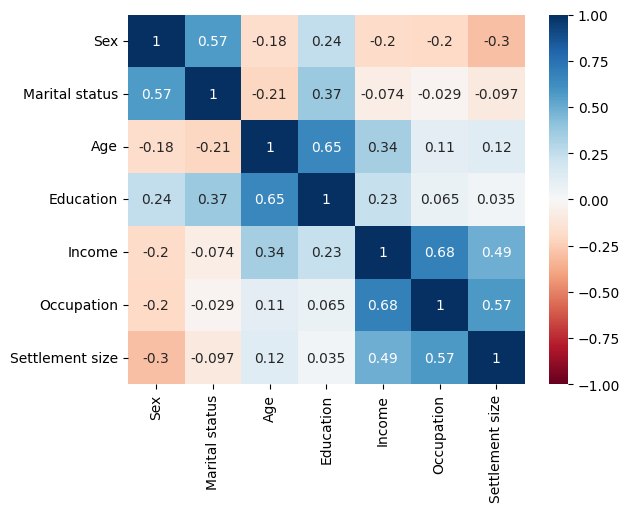

In [ ]:
sns.heatmap(df_segmentation.corr(),
            vmin=-1,
            vmax=1,
            annot=True,
            cmap='RdBu')

different color: RdBu, viridis, autumn, rainbow....

##visualise raw data

Text(0.5, 1.0, 'visualization of raw data')

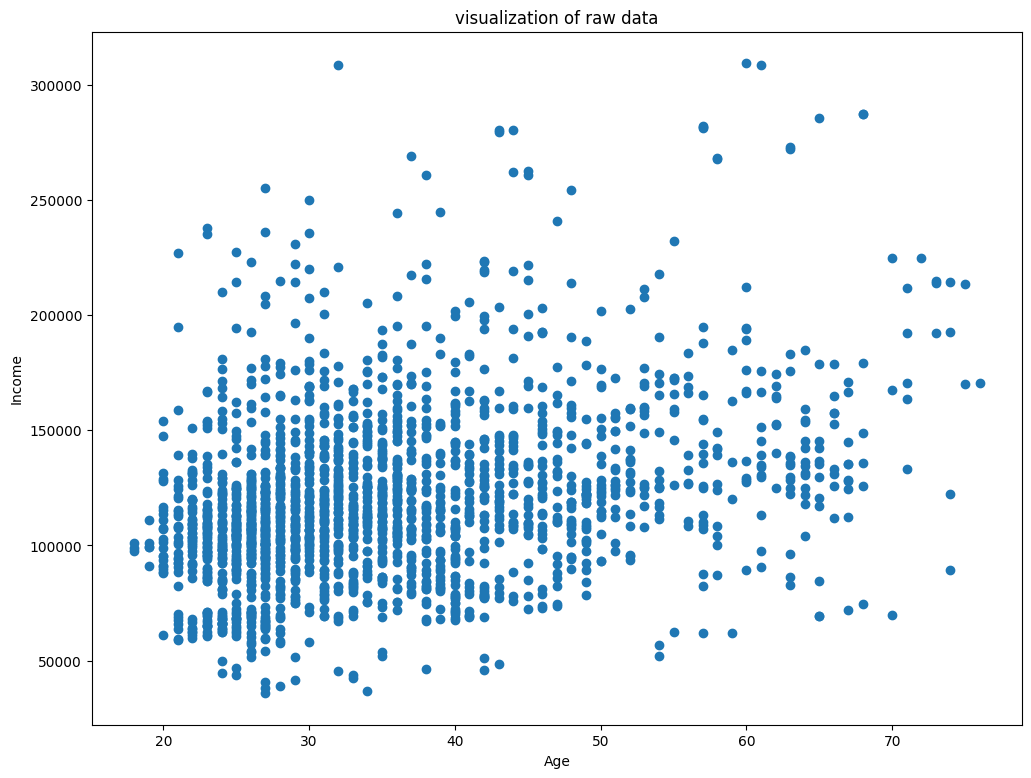

In [ ]:
plt.figure(figsize=(12,9))
plt.scatter(data= df_segmentation,x='Age',y='Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('visualization of raw data')

##Standardisation

In [ ]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

##K-means Clustering

In [ ]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(segmentation_std)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'wcss')

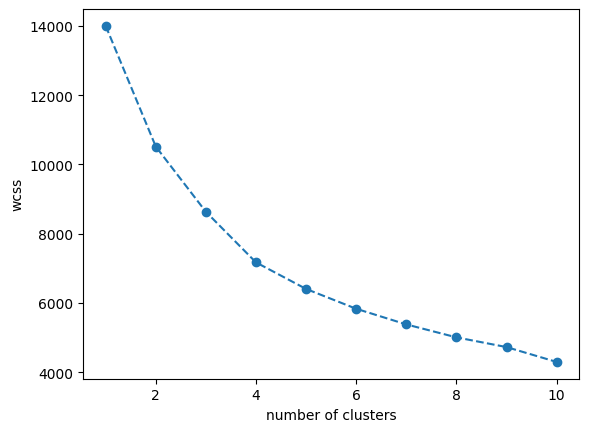

In [ ]:
plt.plot(range(1,11), wcss, marker='o',linestyle='--')
plt.xlabel('number of clusters')
plt.ylabel('wcss')

we will use the elbow method to find the best number of clusters

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(segmentation_std)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

##Results

In [ ]:
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [ ]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()

In [ ]:
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


In [ ]:
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means','Sex']].groupby(['Segment K-means']).count()

In [ ]:
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs']/df_segm_analysis['N Obs'].sum()

In [ ]:
 df_segm_analysis.rename({3:'well_off',
                         2:'fewer-opportunities',
                         0:'standard',
                         1:'career_focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
standard,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
career_focused,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
fewer-opportunities,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
well_off,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [ ]:
df_segm_kmeans['Label'] = df_segm_kmeans['Segment K-means'].map({3:'well_off',
                         2:'fewer-opportunities',
                         0:'standard',
                         1:'career_focused'})

In [ ]:
df_segm_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means,Label
ID,,,,,,,,,
100000001,0,0,67,2,124670,1,2,0,standard
100000002,1,1,22,1,150773,1,2,2,fewer-opportunities
100000003,0,0,49,1,89210,0,0,1,career_focused
100000004,0,0,45,1,171565,1,1,3,well_off
100000005,0,0,53,1,149031,1,1,3,well_off
...,...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,1,career_focused
100001997,1,1,27,1,117744,1,0,2,fewer-opportunities
100001998,0,0,31,0,86400,0,0,1,career_focused


<Axes: xlabel='Age', ylabel='Income'>

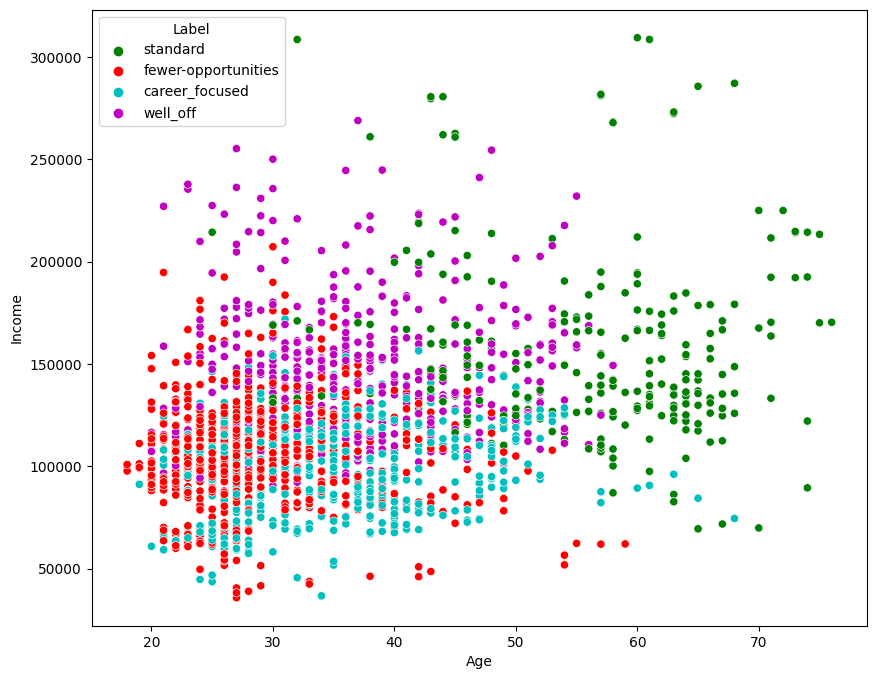

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data= df_segm_kmeans,x= 'Age', y='Income', hue='Label', palette=['g','r','c','m'])

##PCA
dimensionality reduction

principal component analysis

In [ ]:
pca = PCA()

In [ ]:
pca.fit(segmentation_std)

PCA()

In [ ]:

pca.explained_variance_ratio_
#pca component=8

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0, 0.5, 'Cumulative explained variance')

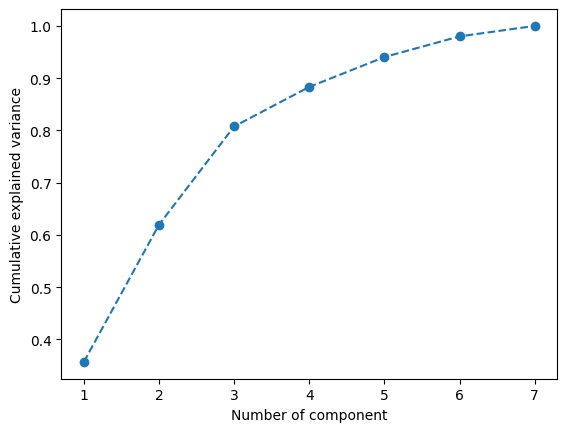

In [ ]:
#find a subset of components, while preserving variance
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker='o',linestyle='--')
plt.xlabel('Number of component')
plt.ylabel('Cumulative explained variance')

rule of thumb: keep 80% of teh variance. so we choose 4

In [ ]:
pca = PCA(n_components=3)
pca.fit(segmentation_std)

PCA(n_components=3)

In [ ]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

loading= correlation between an original variable and a component

In [ ]:
df_pca_comp = pd.DataFrame(data=pca.components_,
                           columns=df_segmentation.columns.values,
                           index=['Component 1','Component 2','Component 3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


<Axes: >

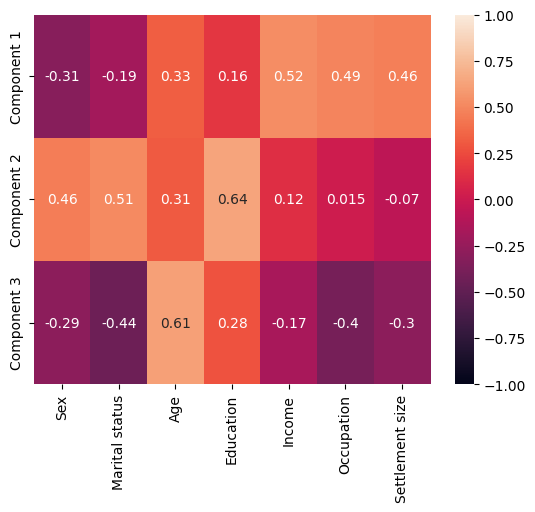

In [ ]:
sns.heatmap(df_pca_comp,
            vmin=-1,
            vmax=1,
            annot=True)

In [ ]:
pca.transform(segmentation_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [ ]:
scores_pca = pca.transform(segmentation_std)

##Kmeans clustering with PCA

In [ ]:
wcss = []
for i in range(1,11):
  kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans_pca.fit(scores_pca)
  wcss.append(kmeans_pca.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'wcss')

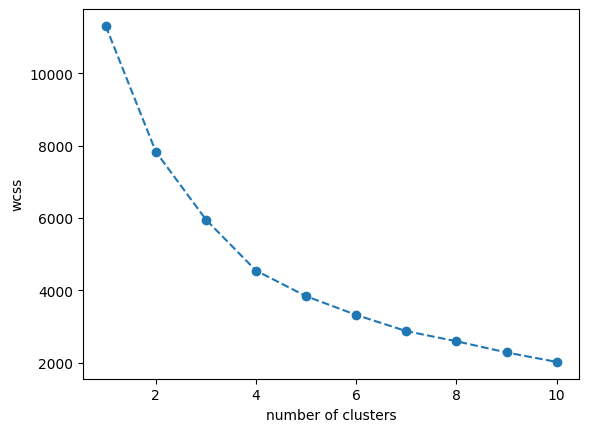

In [ ]:
plt.plot(range(1,11), wcss, marker='o',linestyle='--')
plt.xlabel('number of clusters')
plt.ylabel('wcss')

In [ ]:
kmeans_pca= KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [ ]:
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_segm_kmeans.columns.values[-3:]=['Component 1','Component 2','Component 3']

In [ ]:
df_segm_pca_kmeans['segment k_means PCA'] = kmeans_pca.labels_

In [ ]:
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,0,1,2,segment k_means PCA,Legend
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3,well-off
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0,standard
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2,fewer opportunities
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1,career focused
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1,career focused
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,2,fewer opportunities
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,0,standard
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,2,fewer opportunities
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,0,standard


In [ ]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['segment k_means PCA']).mean()
df_segm_pca_kmeans_freq

<ipython-input-44-f8386aee8fb5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['segment k_means PCA']).mean()


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,0,1,2
segment k_means PCA,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
2,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039


In [ ]:
# Calculate the size of each cluster and its proportion to the entire data set.
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['segment k_means PCA','Sex']].groupby(['segment k_means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'standard',
                                                          1:'career focused',
                                                          2:'fewer opportunities',
                                                          3:'well-off'})
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,0,1,2,N Obs,Prop Obs
segment k_means PCA,,,,,,,,,,,,
standard,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
career focused,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
fewer opportunities,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300
well-off,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325


In [ ]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['segment k_means PCA'].map({0:'standard',
                                                          1:'career focused',
                                                          2:'fewer opportunities',
                                                          3:'well-off'})

In [ ]:
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,0,1,2,segment k_means PCA,Legend
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3,well-off
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0,standard
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2,fewer opportunities
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1,career focused
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1,career focused
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,2,fewer opportunities
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,0,standard
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,2,fewer opportunities
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,0,standard


In [ ]:
df_segm_pca_kmeans.columns

Index([                'Sex',      'Marital status',                 'Age',
                 'Education',              'Income',          'Occupation',
           'Settlement size',                     0,                     1,
                           2, 'segment k_means PCA',              'Legend'],
      dtype='object')

##Data export

In [ ]:
pickle.dump(scaler, open('scaler.pickle', 'wb'))

In [ ]:
pickle.dump(pca, open('pca.pickle', 'wb'))

In [ ]:
pickle.dump(kmeans_pca, open('kmeans_pca.pickle', 'wb'))

##Purchase Analytics



1. purchase probability
2. probability for brand choice
3. purchase quantity

In [ ]:
#import data
df_purchase = pd.read_csv('purchase data.csv')

In [ ]:
df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [ ]:
df_purchase.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

##Import Segmentation Model

In [ ]:
scaler = pickle.load(open('scaler.pickle','rb'))

In [ ]:
pca = pickle.load(open('pca.pickle','rb'))

In [ ]:
kmeans_pca = pickle.load(open('kmeans_pca.pickle','rb'))

##Standardisation

In [ ]:
features = df_purchase[['Sex','Marital status','Age','Education','Income','Occupation','Settlement size']]

In [ ]:
df_purchase_segm_std = scaler.transform(features)

##PCA

In [ ]:
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)

##kmeans PCA

In [ ]:
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)
df_purchase_predictors = df_purchase.copy()

In [ ]:
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca

#Descriptive analysis by segment

##data analysis by customer

In [ ]:
df_purchase_predictors.head(20)

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,2
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,2
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
5,200000001,23,0,0,0,0,0,1.50,1.90,1.99,...,0,0,0,0,47,1,110866,1,0,2
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,0,0,0,0,47,1,110866,1,0,2
7,200000001,37,0,0,0,2,1,1.50,1.90,1.99,...,0,0,0,0,47,1,110866,1,0,2
8,200000001,41,0,0,0,0,0,1.35,1.58,1.97,...,0,0,0,0,47,1,110866,1,0,2
9,200000001,43,0,0,0,0,0,1.35,1.58,1.97,...,0,0,0,0,47,1,110866,1,0,2


In [ ]:
#the number of purchase per customer

temp1 = df_purchase_predictors[['ID','Incidence']].groupby(['ID'], as_index=False).count()
temp1 = temp1.set_index('ID')
temp1 = temp1.rename(columns={'Incidence':'N_Visits'})
temp1.head()

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [ ]:
temp2 = df_purchase_predictors[['ID','Incidence']].groupby(['ID'], as_index=False).sum()
temp2 = temp2.set_index('ID')
temp2 = temp2.rename(columns={'Incidence':'N_Purchases'})
temp3 = temp1.join(temp2)
temp3.head()

,N_Visits,N_Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [ ]:
#average frequency per customer
temp3['Average_N_Purchase']=temp3['N_Purchases']/temp3['N_Visits']
temp3.head()

,N_Visits,N_Purchases,Average_N_Purchase
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [ ]:
temp4 = df_purchase_predictors[['ID','Segment']].groupby(['ID'],as_index=False).mean()
temp4 = temp4.set_index('ID')
df_purchase_descr = temp3.join(temp4)

In [ ]:
df_purchase_descr.head()

,N_Visits,N_Purchases,Average_N_Purchase,Segment
ID,,,,
200000001,101,9,0.089109,2.0
200000002,87,11,0.126437,3.0
200000003,97,10,0.103093,2.0
200000004,85,11,0.129412,2.0
200000005,111,13,0.117117,1.0


##Segment Proportion

In [ ]:
segm_prop = df_purchase_descr[['N_Purchases','Segment']].groupby(['Segment']).count()/df_purchase_descr.shape[0]

In [ ]:
segm_prop = segm_prop.rename(columns={'N_Purchases':'Segment Proportion'})
segm_prop

,Segment Proportion
Segment,
0.0,0.206
1.0,0.220
2.0,0.378
3.0,0.196


([<matplotlib.patches.Wedge at 0x7fda63fba170>,
 [Text(0.8775738829956653, 0.6632224965152423, 'standard'),
  Text(-0.4431970770227849, 1.006765290878892, 'career_focused'),
  Text(-0.8251222011124334, -0.7274430240447516, 'fewer_opportunities'),
  Text(0.8979731265362426, -0.6353300433780268, 'well_off')])

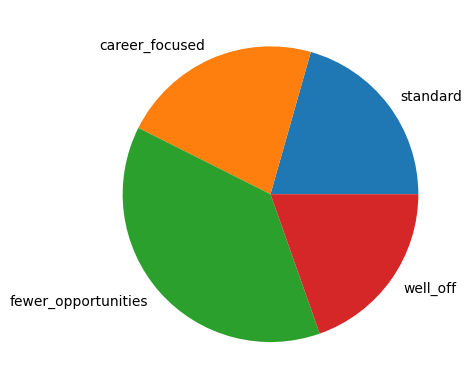

In [ ]:
plt.pie(segm_prop['Segment Proportion'],labels=['standard','career_focused','fewer_opportunities','well_off'])

##Purchase Occasion and Purchase Incidence

we will find a quantitative measure to describe the purchase behaviour by segments.

we will calculate the mean and standard deviation

In [ ]:
segments_mean = df_purchase_descr.groupby(['Segment']).mean()
segments_mean

,N_Visits,N_Purchases,Average_N_Purchase
Segment,,,
0.0,117.699029,24.902913,0.212773
1.0,123.454545,39.827273,0.283102
2.0,113.730159,22.756614,0.201588
3.0,117.295918,34.602041,0.284478


In [ ]:
segments_std = df_purchase_descr.groupby(['Segment']).std()

Text(0, 0.5, 'Number of visitors')

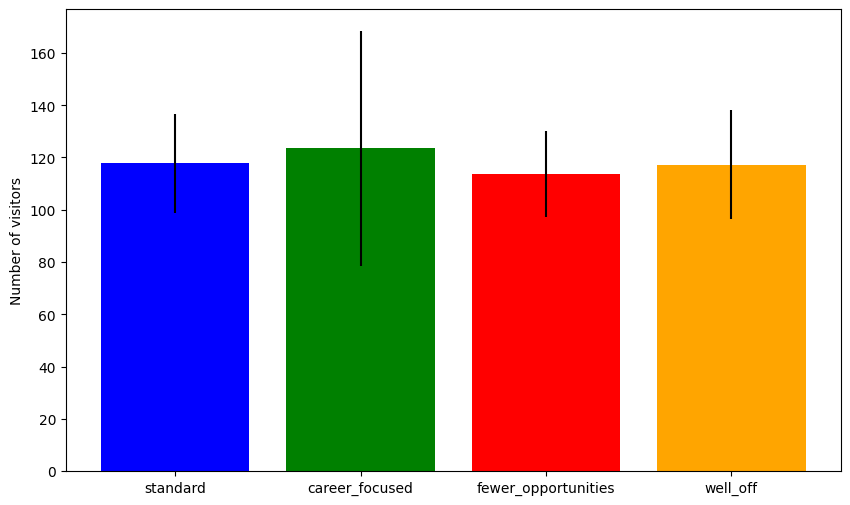

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(x=(0,1,2,3), height=segments_mean['N_Visits'],yerr=segments_std['N_Visits'],
        tick_label=['standard','career_focused','fewer_opportunities','well_off'],
        color=('b','g','r','orange'))
plt.ylabel('Number of visitors')

next we would like to show how often the clients buys a product

Text(0, 0.5, 'Purchaes Incidences')

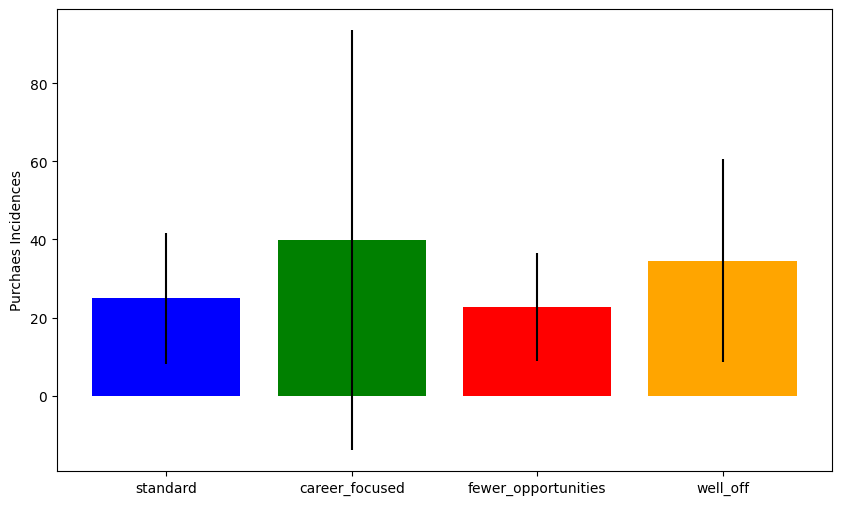

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(x=(0,1,2,3), height=segments_mean['N_Purchases'],yerr=segments_std['N_Purchases'],
        tick_label=['standard','career_focused','fewer_opportunities','well_off'],
        color=('b','g','r','orange'))
plt.ylabel('Purchaes Incidences')

##Brand choice

In [ ]:
df_purchase_incidence = df_purchase_predictors[df_purchase_predictors['Incidence']==1]

In [ ]:
brand_dummies = pd.get_dummies(df_purchase_incidence['Brand'], prefix='Brand',prefix_sep='_')
brand_dummies['segment'],brand_dummies['ID']=df_purchase_incidence['Segment'],df_purchase_incidence['ID']

In [ ]:
brand_dummies.head()

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,segment,ID
6,0,1,0,0,0,2,200000001
11,0,0,0,0,1,2,200000001
19,1,0,0,0,0,2,200000001
24,0,0,0,1,0,2,200000001
29,0,1,0,0,0,2,200000001


In [ ]:
temp = brand_dummies.groupby(['ID'], as_index=True).mean()
temp

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,segment
ID,,,,,,
200000001,0.111111,0.444444,0.000000,0.222222,0.222222,2.0
200000002,0.000000,0.090909,0.000000,0.909091,0.000000,3.0
200000003,0.000000,0.800000,0.000000,0.000000,0.200000,2.0
200000004,0.000000,0.090909,0.000000,0.000000,0.909091,2.0
200000005,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
...,...,...,...,...,...,...
200000496,0.050000,0.700000,0.000000,0.050000,0.200000,0.0
200000497,0.023256,0.651163,0.000000,0.302326,0.023256,2.0
200000498,0.128205,0.589744,0.282051,0.000000,0.000000,0.0


In [ ]:
mean_brand_choice = temp.groupby(['segment'], as_index=True).mean()
mean_brand_choice.head()

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
segment,,,,,
0.0,0.251186,0.396502,0.156481,0.059474,0.136357
1.0,0.072871,0.146808,0.039976,0.112395,0.627951
2.0,0.137567,0.681190,0.020923,0.061548,0.098772
3.0,0.041928,0.117422,0.030610,0.613623,0.196417


([<matplotlib.axis.YTick at 0x7fda613bf2e0>,
 [Text(0, 0, 'standard'),
  Text(0, 1, 'career_focused'),
  Text(0, 2, 'fewer_opportunities'),
  Text(0, 3, 'well_off')])

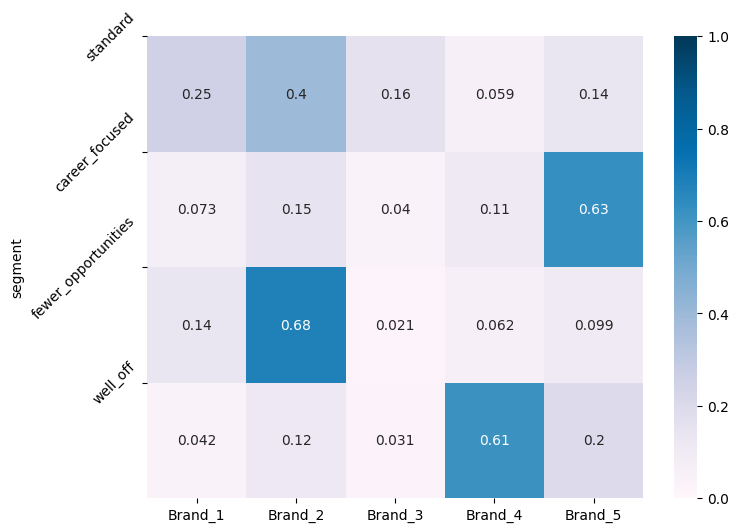

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(mean_brand_choice,
            vmin=0,vmax=1, cmap='PuBu', annot=True)
plt.yticks([0,1,2,3],['standard','career_focused','fewer_opportunities','well_off'], rotation=45)

brand 1 is the cheapest and brand 5 is the most expensive.

for ex: career_focused like to buy brand 5

##Revenue

In [ ]:
temp = df_purchase_predictors[df_purchase_predictors['Brand']==1]
temp.loc[:,'Revenue Brand 1'] = temp['Price_1']*temp['Quantity']

<ipython-input-82-bb7ce17fb4d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:,'Revenue Brand 1'] = temp['Price_1']*temp['Quantity']


In [ ]:
segments_brand_revenue = pd.DataFrame()
segments_brand_revenue[['Segment','Revenue Brand 1']]= temp[['Segment','Revenue Brand 1']].groupby(['Segment'],as_index=False).sum()
segments_brand_revenue

,Segment,Revenue Brand 1
0,0,2611.19
1,1,736.09
2,2,2258.90
3,3,699.47


In [ ]:
temp = df_purchase_predictors[df_purchase_predictors['Brand']==2]
temp.loc[:,'Revenue Brand 2'] = temp['Price_2']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 2']]= temp[['Segment','Revenue Brand 2']].groupby(['Segment'],as_index=False).sum()

<ipython-input-84-2f2165bf5532>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:,'Revenue Brand 2'] = temp['Price_2']*temp['Quantity']


In [ ]:
temp = df_purchase_predictors[df_purchase_predictors['Brand']==3]
temp.loc[:,'Revenue Brand 3'] = temp['Price_3']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 3']]= temp[['Segment','Revenue Brand 3']].groupby(['Segment'],as_index=False).sum()

<ipython-input-85-87162a2e56f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:,'Revenue Brand 3'] = temp['Price_3']*temp['Quantity']


In [ ]:
temp = df_purchase_predictors[df_purchase_predictors['Brand']==4]
temp.loc[:,'Revenue Brand 4'] = temp['Price_4']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 4']]= temp[['Segment','Revenue Brand 4']].groupby(['Segment'],as_index=False).sum()

<ipython-input-86-2b900cb0f3a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:,'Revenue Brand 4'] = temp['Price_4']*temp['Quantity']


In [ ]:
temp = df_purchase_predictors[df_purchase_predictors['Brand']==5]
temp.loc[:,'Revenue Brand 5'] = temp['Price_5']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 5']]= temp[['Segment','Revenue Brand 5']].groupby(['Segment'],as_index=False).sum()

<ipython-input-87-b2b5b9df95a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:,'Revenue Brand 5'] = temp['Price_5']*temp['Quantity']


In [ ]:
segments_brand_revenue['Total Revenue'] = (segments_brand_revenue['Revenue Brand 1']+
                                          segments_brand_revenue['Revenue Brand 2']+
                                          segments_brand_revenue['Revenue Brand 3']+
                                          segments_brand_revenue['Revenue Brand 4']+
                                          segments_brand_revenue['Revenue Brand 5'])

In [ ]:
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue
0,0,2611.19,4768.52,3909.17,861.38,2439.75,14590.01
1,1,736.09,1746.42,664.75,2363.84,19441.06,24952.16
2,2,2258.90,13955.14,716.25,1629.31,2230.50,20790.10
3,3,699.47,1298.23,731.35,14185.57,5509.69,22424.31


In [ ]:
segments_brand_revenue['Segment Proportions'] = segm_prop['Segment Proportion']


In [ ]:
segments_brand_revenue['Segment'] = segments_brand_revenue['Segment'].map({0:'Standard',
                                                                             1:'career-focused',
                                                                             2:'fewer-Opportunities',
                                                                             3:'Well-off'})
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportions
0,Standard,2611.19,4768.52,3909.17,861.38,2439.75,14590.01,0.206
1,career-focused,736.09,1746.42,664.75,2363.84,19441.06,24952.16,0.220
2,fewer-Opportunities,2258.90,13955.14,716.25,1629.31,2230.50,20790.10,0.378
3,Well-off,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.196


if brand 3 reduces its price, the standard segment could pivot towards it

In [ ]:
df_pa = df_purchase_predictors

#Purchase Probability Model

In [ ]:
Y = df_pa['Incidence']
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1']+
                   df_pa['Price_2']+
                   df_pa['Price_3']+
                   df_pa['Price_4']+
                   df_pa['Price_5'])/5


In [ ]:
X.head()

,Mean_Price
0,2.044
1,2.028
2,2.028
3,2.028
4,2.030


In [ ]:
model_purchase = LogisticRegression(solver='sag')
model_purchase.fit(X,Y)


LogisticRegression(solver='sag')

In [ ]:
model_purchase.coef_

array([[-2.34789324]])

minus means that a decrease in price would lead to an increase in purchase probability

##Price Elasticity of Purchase Probabilty

Price elasticity means how much the probability of purchase for the product in percent to the price increment. If the value is above 100% (>1), it means that the probability is elastic, and if the value is below 100% (<1), it means the probability is inelastic.

price elasticity of purchas eprobability: %change in purchase probability in response to a 1% change in price

In [ ]:
df_pa[['Price_1','Price_2','Price_3','Price_4','Price_5']].describe()


,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


minimun:1.1   and   maximum:2.8. we can choose a range between .5 and 3.5

In [ ]:
price_range = np.arange(0.5,3.5,0.01)
df_price_range = pd.DataFrame(price_range)

In [ ]:
Y_pr = model_purchase.predict_proba(df_price_range)
#Y_pr
#first value show the probability of no purchase, while the second the probability of purchase

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
purchase_pr = Y_pr[:][:,1]

E =( D Pr(purchase)/Pr(purchase))/(D Price/Price)=( D Pr(purchase)/D Price)*(Price/Pr(purchase))


the simplified formula for elasticity is:

E = beta*price(1-Pr(purchase))

In [ ]:
pe = model_purchase.coef_[:,0]*price_range*(1-purchase_pr)

In [ ]:
df_price_elasticities = pd.DataFrame(price_range)
df_price_elasticities = df_price_elasticities.rename(columns={0:'Price_point'})
df_price_elasticities['Mean_PE'] = pe
df_price_elasticities

,Price_point,Mean_PE
0,0.50,-0.096426
1,0.51,-0.100495
2,0.52,-0.104691
3,0.53,-0.109017
4,0.54,-0.113477
...,...,...
295,3.45,-8.012341
296,3.46,-8.037589
297,3.47,-8.062802
298,3.48,-8.087982


Text(0, 0.5, 'Elasticity')

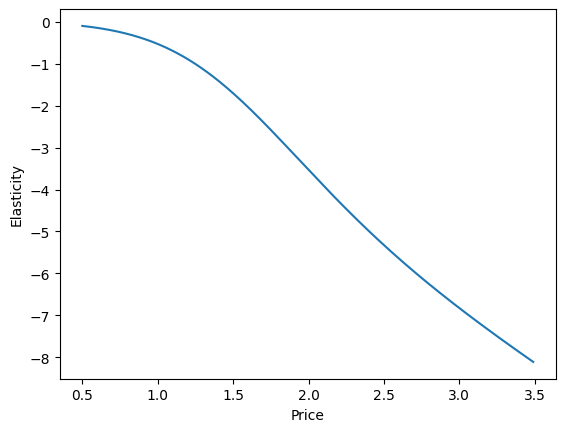

In [ ]:
plt.plot(price_range, pe)
plt.xlabel('Price')
plt.ylabel('Elasticity')

interesting points:  1)elasticity is negative. 2)At first the decrease in price is slow and then it becomes steeper after 1.1 mark.

the price elasticity decreases as price increases

abs(E)<1 inelastic otherwise elastic

for ex number 4: for each increase in price by one percent, the probability of purchase will change -0.112709. we expect it to decrease by -0.112709.

for ex number 296: look at the 3.46 price, the elasticity is 296 -8.028113. here an uncrease of one percent in price would translate into a decline of -8.028113 percent of purchase probability.

for inelastic values we increase teh price. for elastic values we decrease price.

price lower than 1.25, we can increase our product price withoit losing too much in terms of purchase probability. for price is higher than 1.25, we have more to gain by reducing our prices.

++++++++example for question: A company has a product with a price of 2.3 dollars on the market. They have estimated that the price elasticity of purchase probability at this price point is -0.9. If you are an adviser for the marketing team of the company what would you recommend:

teh company should increase the price without fear of losing too many customers

#Purchase probability by segment
#segment 1

In [ ]:
df_pa_segment_1 = df_pa[df_pa['Segment']==1]
Y = df_pa_segment_1['Incidence']
X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_1['Price_1']+
                   df_pa_segment_1['Price_2']+
                   df_pa_segment_1['Price_3']+
                   df_pa_segment_1['Price_4']+
                   df_pa_segment_1['Price_5'])/5

In [ ]:
model_incident_segment_1 = LogisticRegression(solver='sag')
model_incident_segment_1.fit(X,Y)

LogisticRegression(solver='sag')

In [ ]:
model_incident_segment_1.coef_

array([[-1.71197704]])

this segmnet will be less elastic than our average customer because coef of average was -2.34

In [ ]:
Y_segment_1 = model_incident_segment_1.predict_proba(df_price_range)
purchase_pr_segemnt_1 = Y_segment_1[:][:,1]
pe_segment_1 = model_incident_segment_1.coef_[:,0]*price_range*(1-purchase_pr_segemnt_1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
df_price_elasticities['PE_segment_1']=pe_segment_1

Text(0, 0.5, 'Price Elasticity of Purchase probability')

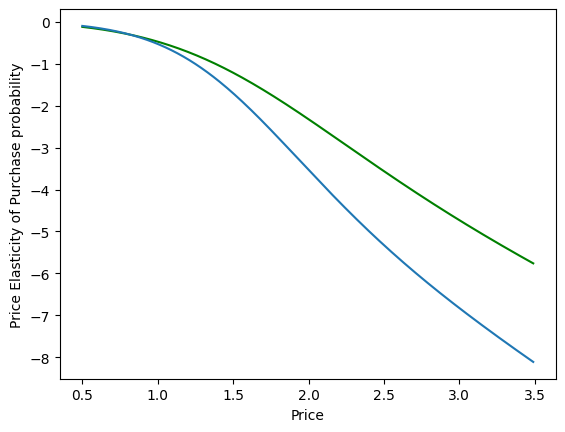

In [ ]:
plt.plot(price_range, pe_segment_1,'green')
plt.plot(price_range, pe)
plt.xlabel('Price')
plt.ylabel('Price Elasticity of Purchase probability')

the purchase probability of this segment are less elastic than average

price<1.39 increase price>1.39 decrease

How would you interpret the elasticity result of? When PED is greater than one, demand is elastic. This can be interpreted as consumers being very sensitive to changes in price: a 1% increase in price will lead to a drop in quantity demanded of more than 1%. When PED is less than one, demand is inelastic.

What is Inelastic Demand? Inelastic demand is when a buyer's demand for a product does not change as much as its change in price. When price increases by 20% and demand decreases by only 1%, demand is said to be inelastic.

##segment 2

In [ ]:
df_pa_segment_2 = df_pa[df_pa['Segment']==2]
Y = df_pa_segment_2['Incidence']
X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_2['Price_1']+
                   df_pa_segment_2['Price_2']+
                   df_pa_segment_2['Price_3']+
                   df_pa_segment_2['Price_4']+
                   df_pa_segment_2['Price_5'])/5


In [ ]:
model_incident_segment_2 = LogisticRegression(solver='sag')
model_incident_segment_2.fit(X,Y)

LogisticRegression(solver='sag')

In [ ]:
model_incident_segment_2.coef_
Y_segment_2 = model_incident_segment_2.predict_proba(df_price_range)
purchase_pr_segemnt_2 = Y_segment_2[:][:,1]
pe_segment_2 = model_incident_segment_2.coef_[:,0]*price_range*(1-purchase_pr_segemnt_2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
df_price_elasticities['PE_segment_2']=pe_segment_2

Text(0, 0.5, 'Price Elasticity of Purchase probability')

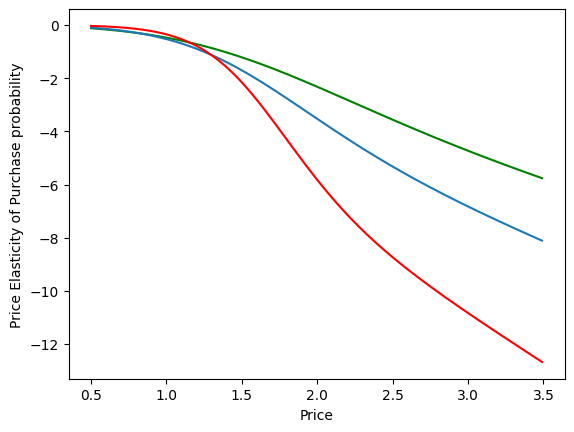

In [ ]:
plt.plot(price_range, pe_segment_1,'green')
plt.plot(price_range, pe)
plt.plot(price_range, pe_segment_2,'red')
plt.xlabel('Price')
plt.ylabel('Price Elasticity of Purchase probability')

the red loine is much steeper. this means that with an increase in price, they become more and more elastic, much faster.

##all segments

In [ ]:
df_pa_segment_0 = df_pa[df_pa['Segment']==0]
Y = df_pa_segment_0['Incidence']
X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_0['Price_1']+
                   df_pa_segment_0['Price_2']+
                   df_pa_segment_0['Price_3']+
                   df_pa_segment_0['Price_4']+
                   df_pa_segment_0['Price_5'])/5
model_incident_segment_0 = LogisticRegression(solver='sag')
model_incident_segment_0.fit(X,Y)

LogisticRegression(solver='sag')

In [ ]:
model_incident_segment_0.coef_
Y_segment_0 = model_incident_segment_0.predict_proba(df_price_range)
purchase_pr_segemnt_0 = Y_segment_0[:][:,1]
pe_segment_0 = model_incident_segment_0.coef_[:,0]*price_range*(1-purchase_pr_segemnt_0)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
df_pa_segment_3 = df_pa[df_pa['Segment']==3]
Y = df_pa_segment_3['Incidence']
X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_3['Price_1']+
                   df_pa_segment_3['Price_2']+
                   df_pa_segment_3['Price_3']+
                   df_pa_segment_3['Price_4']+
                   df_pa_segment_3['Price_5'])/5
model_incident_segment_3 = LogisticRegression(solver='sag')
model_incident_segment_3.fit(X,Y)

LogisticRegression(solver='sag')

In [ ]:
model_incident_segment_3.coef_
Y_segment_3 = model_incident_segment_3.predict_proba(df_price_range)
purchase_pr_segemnt_3 = Y_segment_3[:][:,1]
pe_segment_3 = model_incident_segment_3.coef_[:,0]*price_range*(1-purchase_pr_segemnt_3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
df_price_elasticities['PE_segment_0']=pe_segment_0
df_price_elasticities['PE_segment_3']=pe_segment_3

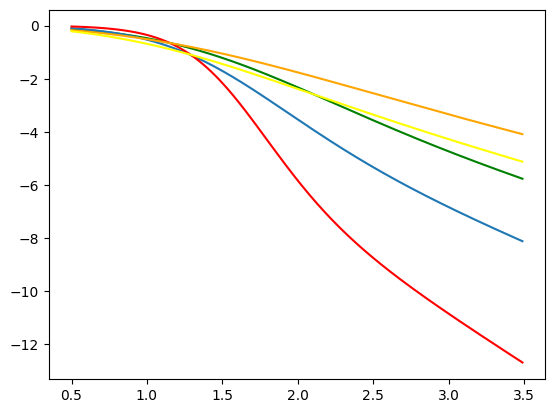

In [ ]:
plt.plot(price_range, pe_segment_1,'green')
plt.plot(price_range, pe)
plt.plot(price_range, pe_segment_2,'red')
plt.plot(price_range, pe_segment_3,'orange')
plt.plot(price_range, pe_segment_0,'yellow')

#Purchase Probability with Promotion Features

In [ ]:
Y = df_pa['Incidence']
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] +
                   df_pa['Price_2'] +
                   df_pa['Price_3'] +
                   df_pa['Price_4'] +
                   df_pa['Price_5']) / 5

In [ ]:
# We include a second promotion feature. We'd like to examine the effects of promotions on purchase probability.
# We calculate the average promotion rate across the five brands. We add the mean price for the brands.
X['Mean_Promotion'] = (df_pa['Promotion_1'] +
                       df_pa['Promotion_2'] +
                       df_pa['Promotion_3'] +
                       df_pa['Promotion_4'] +
                       df_pa['Promotion_5'] ) / 5
X.head()

,Mean_Price,Mean_Promotion
0,2.044,0.2
1,2.028,0.0
2,2.028,0.0
3,2.028,0.0
4,2.030,0.0


In [ ]:
# The coefficient for promotion is positive.
# Therefore, there is a positive relationship between promotion and purchase probability.
model_incident_promotion = LogisticRegression(solver = 'sag')
model_incident_promotion.fit(X, Y)
model_incident_promotion.coef_

array([[-1.49366383,  0.56157427]])

fist is for price and teh seconf is for promotion. the positive meaning that with increase in promotion, the purchase probability also increases.

In [ ]:
# We create a data frame on which our model will predict. We need to include A price and promotion feature.
# First, we'll include the price range as the price feature. Next, we'll include the promotion feature.
df_price_elasticity_promotion = pd.DataFrame(price_range)
df_price_elasticity_promotion = df_price_elasticity_promotion.rename(columns = {0: "Price_Range"})
df_price_elasticity_promotion

,Price_Range
0,0.50
1,0.51
2,0.52
3,0.53
4,0.54
...,...
295,3.45
296,3.46
297,3.47
298,3.48


we are interested in the overall effect

---

of promotion activities on elasticities.

case 1:promotion activities for all brands

case 2:no promotional activities

In [ ]:
# We'll calculate price elasticities of purchase probability when we assume there is a promotion across at each price points.
df_price_elasticity_promotion['Promotion'] = 1
df_price_elasticity_promotion

,Price_Range,Promotion
0,0.50,1
1,0.51,1
2,0.52,1
3,0.53,1
4,0.54,1
...,...,...
295,3.45,1
296,3.46,1
297,3.47,1
298,3.48,1


In [ ]:
print(df_price_elasticity_promotion.columns)


Index(['Price_Range', 'Promotion'], dtype='object')


In [ ]:
df_price_elasticity_promotion.rename(columns={'Price_Range': 'Mean_Price','Promotion': 'Mean_Promotion'}, inplace=True)
df_price_elasticities.columns

Index(['Price_point', 'Mean_PE', 'PE_segment_1', 'PE_segment_2',
       'PE_segment_0', 'PE_segment_3'],
      dtype='object')

In [ ]:

# Purchase Probability with Promotion Model Prediction
Y_promotion = model_incident_promotion.predict_proba(df_price_elasticity_promotion)
Y_promotion

array([[0.16829414, 0.83170586],
       [0.17039521, 0.82960479],
       [0.17251707, 0.82748293],
       [0.17465979, 0.82534021],
       [0.17682344, 0.82317656],
       [0.17900807, 0.82099193],
       [0.18121376, 0.81878624],
       [0.18344055, 0.81655945],
       [0.18568849, 0.81431151],
       [0.18795765, 0.81204235],
       [0.19024805, 0.80975195],
       [0.19255975, 0.80744025],
       [0.19489278, 0.80510722],
       [0.19724717, 0.80275283],
       [0.19962294, 0.80037706],
       [0.20202013, 0.79797987],
       [0.20443876, 0.79556124],
       [0.20687883, 0.79312117],
       [0.20934037, 0.79065963],
       [0.21182337, 0.78817663],
       [0.21432784, 0.78567216],
       [0.21685377, 0.78314623],
       [0.21940116, 0.78059884],
       [0.22196999, 0.77803001],
       [0.22456025, 0.77543975],
       [0.2271719 , 0.7728281 ],
       [0.22980493, 0.77019507],
       [0.2324593 , 0.7675407 ],
       [0.23513497, 0.76486503],
       [0.23783189, 0.76216811],
       [0.

In [ ]:
promo = Y_promotion[:, 1]
price_elasticity_promo = (model_incident_promotion.coef_[:, 0] * price_range) * (1 - promo)

In [ ]:
df_price_elasticities['Elasticity_promotion_1'] = price_elasticity_promo
df_price_elasticities

,Price_point,Mean_PE,PE_segment_1,PE_segment_2,PE_segment_0,PE_segment_3,Elasticity_promotion_1
0,0.50,-0.096426,-0.119112,-0.030797,-0.211187,-0.168092,-0.125687
1,0.51,-0.100495,-0.123296,-0.032556,-0.217757,-0.173019,-0.129802
2,0.52,-0.104691,-0.127573,-0.034401,-0.224436,-0.178016,-0.133995
3,0.53,-0.109017,-0.131945,-0.036337,-0.231222,-0.183084,-0.138268
4,0.54,-0.113477,-0.136413,-0.038367,-0.238119,-0.188223,-0.142622
...,...,...,...,...,...,...,...
295,3.45,-8.012341,-5.681134,-12.530901,-5.051622,-4.023831,-4.860111
296,3.46,-8.037589,-5.701291,-12.567793,-5.068477,-4.038702,-4.878311
297,3.47,-8.062802,-5.721410,-12.604667,-5.085314,-4.053556,-4.896480
298,3.48,-8.087982,-5.741494,-12.641525,-5.102133,-4.068395,-4.914619


##Price Elasticity without Promotion





In [ ]:
df_price_elasticity_promotion_no = pd.DataFrame(price_range)
df_price_elasticity_promotion_no = df_price_elasticity_promotion_no.rename(columns = {0: "Price_Range"})
# Promotion feature -No Promotion.
# We assume there aren't any promotional activities on any of the price points.
# We examine the elasticity of purchase probability when there isn't promotion.
df_price_elasticity_promotion_no['Promotion'] = 0

In [ ]:

df_price_elasticity_promotion_no.columns

Index(['Price_Range', 'Promotion'], dtype='object')

In [ ]:
df_price_elasticity_promotion_no.rename(columns={'Price_Range': 'Mean_Price','Promotion': 'Mean_Promotion'}, inplace=True)
#Purchase Probability without Promotion Model Prediction
Y_no_promo = model_incident_promotion.predict_proba(df_price_elasticity_promotion_no)
no_promo = Y_no_promo[: , 1]
price_elasticity_no_promo = model_incident_promotion.coef_[:, 0] * price_range *(1- no_promo)
# Update master data frame to include purchase probability elasticities without promotion.
# We can now see the values with and without promotion and compare them for each price point in our price range.
df_price_elasticities['Elasticity_Promotion_0'] = price_elasticity_no_promo

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability with and without Promotion')

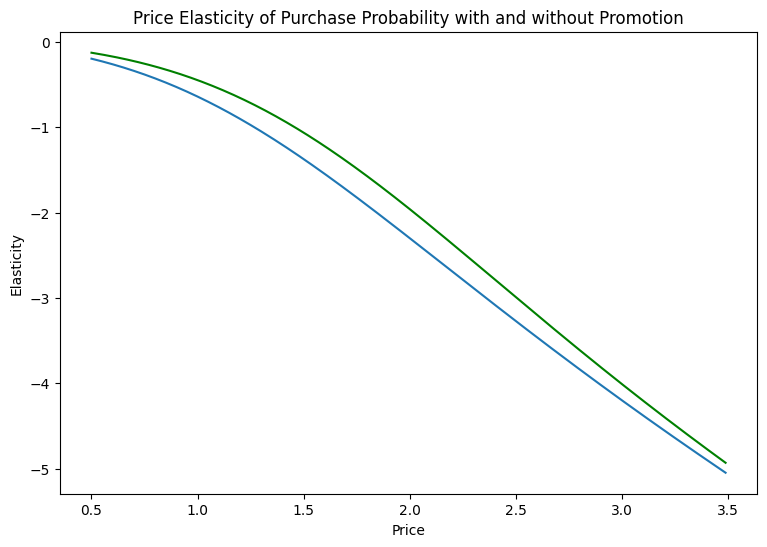

In [ ]:
# Plot purchase elasticities with and without promotion side by side for comprarisson.
# Here we observe that the purchase probability elasticity of the customer is less elastic when there is promotion.
# This is an important insight for marketers, as according to our model people are more likely to buy a product if there is
# some promotional activity rather than purchase a product with the same price, when it isn't on promotion.
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_no_promo)
plt.plot(price_range, price_elasticity_promo, 'green')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability with and without Promotion')

#Brand choice

In [ ]:
brand_choice = df_pa[df_pa['Incidence']==1]

In [ ]:
Y = brand_choice['Brand']

In [ ]:
features = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
X = brand_choice[features]


In [ ]:
model_brand_choice = LogisticRegression(solver='sag', multi_class='multinomial')
model_brand_choice.fit(X,Y)

LogisticRegression(multi_class='multinomial', solver='sag')

In [ ]:
bc_coef = pd.DataFrame(model_brand_choice.coef_)
bc_coef

,0,1,2,3,4
0,-3.915929,0.658472,2.417822,0.704105,-0.202076
1,1.274624,-1.879851,-0.212607,-0.206333,0.587882
2,1.624122,0.562081,0.500660,1.039462,0.452718
3,0.574551,0.395594,-1.400561,-1.246235,0.249365
4,0.442631,0.263704,-1.305314,-0.290999,-1.087888


In [ ]:
bc_coef = pd.DataFrame(np.transpose(model_brand_choice.coef_))
coefficients = ['coef_Brand_1','coef_Brand_2','coef_Brand_3','coef_Brand_4','coef_Brand_5']
bc_coef.columns = [coefficients]
prices = ['Price_1','Price_2','Price_3','Price_4','Price_5']
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,coef_Brand_1,coef_Brand_2,coef_Brand_3,coef_Brand_4,coef_Brand_5
Price_1,-3.92,1.27,1.62,0.57,0.44
Price_2,0.66,-1.88,0.56,0.40,0.26
Price_3,2.42,-0.21,0.50,-1.40,-1.31
Price_4,0.70,-0.21,1.04,-1.25,-0.29
Price_5,-0.20,0.59,0.45,0.25,-1.09


 A regression coefficient describes the size and direction of the relationship between a predictor and the response variable.

##own price elasticity brand 5

you would like to know the effect of price changes to your own brand price

you would like to know what would happen if your competitors change the pricing

In [ ]:
df_own_brand_5 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5['Price_1'] = brand_choice['Price_1'].mean()
df_own_brand_5['Price_2'] = brand_choice['Price_2'].mean()
df_own_brand_5['Price_3'] = brand_choice['Price_3'].mean()
df_own_brand_5['Price_4'] = brand_choice['Price_4'].mean()
df_own_brand_5['Price_5'] = price_range
df_own_brand_5

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,2.159658,0.50
1,1.384559,1.764717,2.006694,2.159658,0.51
2,1.384559,1.764717,2.006694,2.159658,0.52
3,1.384559,1.764717,2.006694,2.159658,0.53
4,1.384559,1.764717,2.006694,2.159658,0.54
...,...,...,...,...,...
295,1.384559,1.764717,2.006694,2.159658,3.45
296,1.384559,1.764717,2.006694,2.159658,3.46
297,1.384559,1.764717,2.006694,2.159658,3.47
298,1.384559,1.764717,2.006694,2.159658,3.48


In [ ]:
predict_brand_5 = model_brand_choice.predict_proba(df_own_brand_5)
pr_own_brand_5 = predict_brand_5[:][:,4]

In [ ]:
beta5= bc_coef.iloc[4,4]
own_price_elacticity_brand_5 = beta5*price_range*(1-pr_own_brand_5)

In [ ]:
df_price_elasticities['Brand_5'] = own_price_elacticity_brand_5
pd.options.display.max_rows = None
df_price_elasticities

,Price_point,Mean_PE,PE_segment_1,PE_segment_2,PE_segment_0,PE_segment_3,Elasticity_promotion_1,Elasticity_Promotion_0,Brand_5
0,0.50,-0.096426,-0.119112,-0.030797,-0.211187,-0.168092,-0.125687,-0.195584,-0.049055
1,0.51,-0.100495,-0.123296,-0.032556,-0.217757,-0.173019,-0.129802,-0.201703,-0.050616
2,0.52,-0.104691,-0.127573,-0.034401,-0.224436,-0.178016,-0.133995,-0.207925,-0.052206
3,0.53,-0.109017,-0.131945,-0.036337,-0.231222,-0.183084,-0.138268,-0.214249,-0.053827
4,0.54,-0.113477,-0.136413,-0.038367,-0.238119,-0.188223,-0.142622,-0.220678,-0.055477
5,0.55,-0.118073,-0.140979,-0.040495,-0.245125,-0.193434,-0.147058,-0.227212,-0.057158
6,0.56,-0.122809,-0.145645,-0.042727,-0.252242,-0.198718,-0.151577,-0.233851,-0.058870
7,0.57,-0.127688,-0.150411,-0.045065,-0.259470,-0.204074,-0.156179,-0.240597,-0.060614
8,0.58,-0.132714,-0.155279,-0.047516,-0.266811,-0.209504,-0.160867,-0.247449,-0.062390
9,0.59,-0.137890,-0.160251,-0.050084,-0.274264,-0.215007,-0.165640,-0.254410,-0.064199


Text(0, 0.5, 'Elasticity')

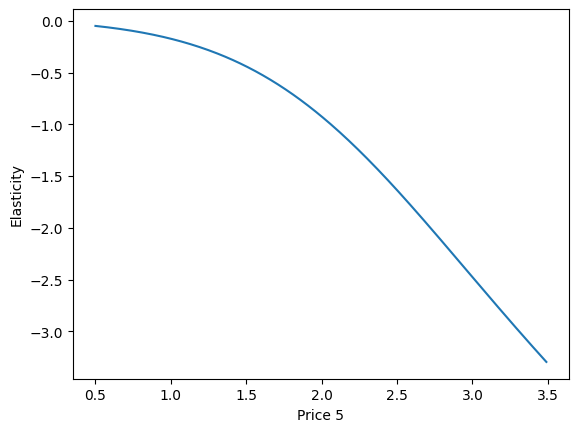

In [ ]:
plt.plot(price_range,own_price_elacticity_brand_5)
plt.xlabel('Price 5')
plt.ylabel('Elasticity')

##Cross Price Elasticity brand 5, Cross brand 4

In [ ]:
df_brand5_cross_brand4 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4['Price_1'] = brand_choice['Price_1'].mean()
df_brand5_cross_brand4['Price_2'] = brand_choice['Price_2'].mean()
df_brand5_cross_brand4['Price_3'] = brand_choice['Price_3'].mean()
df_brand5_cross_brand4['Price_4'] = price_range
df_brand5_cross_brand4['Price_5'] = brand_choice['Price_5'].mean()

df_brand5_cross_brand4.head(4)

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,0.50,2.654296
1,1.384559,1.764717,2.006694,0.51,2.654296
2,1.384559,1.764717,2.006694,0.52,2.654296
3,1.384559,1.764717,2.006694,0.53,2.654296


E = -beta(own price) * price(cross brand)* Pr(cross brand



)

In [ ]:
predict_brand5_cross_brand4 = model_brand_choice.predict_proba(df_brand5_cross_brand4)
pr_brand_4 = predict_brand5_cross_brand4[:][:,3]
brand5_cross_brand4_price_elasticity = -beta5*price_range*pr_brand_4

In [ ]:
df_price_elasticities['Brand_5_cross_brand_4']=brand5_cross_brand4_price_elasticity
df_price_elasticities

,Price_point,Mean_PE,PE_segment_1,PE_segment_2,PE_segment_0,PE_segment_3,Elasticity_promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_cross_brand_4
0,0.50,-0.096426,-0.119112,-0.030797,-0.211187,-0.168092,-0.125687,-0.195584,-0.049055,0.332011
1,0.51,-0.100495,-0.123296,-0.032556,-0.217757,-0.173019,-0.129802,-0.201703,-0.050616,0.337287
2,0.52,-0.104691,-0.127573,-0.034401,-0.224436,-0.178016,-0.133995,-0.207925,-0.052206,0.342506
3,0.53,-0.109017,-0.131945,-0.036337,-0.231222,-0.183084,-0.138268,-0.214249,-0.053827,0.347668
4,0.54,-0.113477,-0.136413,-0.038367,-0.238119,-0.188223,-0.142622,-0.220678,-0.055477,0.352773
5,0.55,-0.118073,-0.140979,-0.040495,-0.245125,-0.193434,-0.147058,-0.227212,-0.057158,0.357820
6,0.56,-0.122809,-0.145645,-0.042727,-0.252242,-0.198718,-0.151577,-0.233851,-0.058870,0.362809
7,0.57,-0.127688,-0.150411,-0.045065,-0.259470,-0.204074,-0.156179,-0.240597,-0.060614,0.367740
8,0.58,-0.132714,-0.155279,-0.047516,-0.266811,-0.209504,-0.160867,-0.247449,-0.062390,0.372614
9,0.59,-0.137890,-0.160251,-0.050084,-0.274264,-0.215007,-0.165640,-0.254410,-0.064199,0.377429


Text(0.5, 1.0, 'Cross Price Elasticity of Brand 5 wrt to Brand 4')

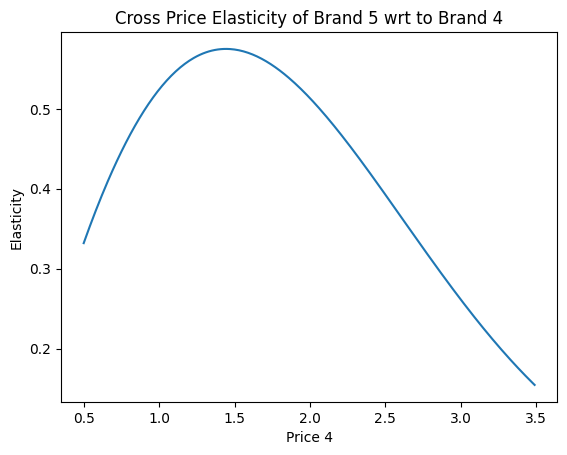

In [ ]:
plt.plot(price_range, brand5_cross_brand4_price_elasticity)
plt.xlabel('Price 4')
plt.ylabel('Elasticity')
plt.title('Cross Price Elasticity of Brand 5 wrt to Brand 4')

positive shows that if competitor brand 4 increase prices, the purchase probability for our own brand would increase.

###E (cross brand)>0    substitute

in our example cross price elasticities will be positive as all brands are substitutes for one another.

###|E (cross brand)|>|E(own brand)|   strong substitute



minimum and maximum of price_4 are 1.76 and 2.26

we observed teh elasticity is steadily decreasing.this signals that with an increase in price, the purchase probability changes more slowly. note it isis positive. therefore our purchase probability still increase with the increase in price of brand 4 but at slower rate.  

we can conclude that when it comes to teh average customer brand 4 is an weak substitute for brand 5.

brand 5 can create a marketing strategy for targeting customers which choose brand 4 and attract them to buy teh own brand

##Own and Cross-Price Elasticity by Segment

###well-off

from our descriptive analysis (heatmap), we found out that the well-off segment has a strong prefrence for Brand 4.it should be interesting to observe their behaviour with respect to the price changes in brand 4.

In [ ]:
brand_choice_s3 = df_pa[df_pa['Incidence']==1]
brand_choice_s3 = brand_choice_s3[brand_choice_s3['Segment']==3]

In [ ]:
# Brand Choice Model estimation.
Y = brand_choice_s3['Brand']
brand_choice_s3 = pd.get_dummies(brand_choice_s3, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s3[features]
model_brand_choice_s3 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s3.fit(X, Y)

# Coefficients table for segment 3
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s3.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,coef_Brand_1,coef_Brand_2,coef_Brand_3,coef_Brand_4,coef_Brand_5
Price_1,-2.15,1.33,0.82,0.12,-0.11
Price_2,-0.96,-1.38,1.29,0.78,0.27
Price_3,2.01,-1.65,-0.49,0.03,0.11
Price_4,2.52,0.96,-0.25,-1.90,-1.33
Price_5,-0.99,-0.30,1.17,0.56,-0.44


In [ ]:
# Calculating own-brand price elasticity for brand 5 and the Well-off segment.
df_own_brand_5_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_own_brand_5_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_own_brand_5_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_own_brand_5_s3['Price_4'] = brand_choice_s3['Price_4'].mean()
df_own_brand_5_s3['Price_5'] = price_range

predict_own_brand_5_s3 = model_brand_choice_s3.predict_proba(df_own_brand_5_s3)
pr_own_brand_5_s3 = predict_own_brand_5_s3[: ][: , 4]

own_price_elasticity_brand_5_s3 =  beta5 * price_range * (1 - pr_own_brand_5_s3)
df_price_elasticities['Brand 5 S3'] = own_price_elasticity_brand_5_s3

In [ ]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Well-off segment.
df_brand5_cross_brand4_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_brand5_cross_brand4_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_brand5_cross_brand4_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_brand5_cross_brand4_s3['Price_4'] = price_range
df_brand5_cross_brand4_s3['Price_5'] = brand_choice_s3['Price_5'].mean()

predict_brand5_cross_brand4_s3 = model_brand_choice_s3.predict_proba(df_brand5_cross_brand4_s3)
pr_cross_brand_5_s3 = predict_brand5_cross_brand4_s3[: ][: , 3]

# Update master data frame to include the newly obtained cross-brand price elasticities.
brand5_cross_brand4_price_elasticity_s3 = -beta5 * price_range * pr_cross_brand_5_s3
df_price_elasticities['Brand_5_Cross_Brand_4_S3'] = brand5_cross_brand4_price_elasticity_s3
pd.options.display.max_rows = None
df_price_elasticities

,Price_point,Mean_PE,PE_segment_1,PE_segment_2,PE_segment_0,PE_segment_3,Elasticity_promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_cross_brand_4,Brand 5 S3,Brand_5_Cross_Brand_4_S3
0,0.50,-0.096426,-0.119112,-0.030797,-0.211187,-0.168092,-0.125687,-0.195584,-0.049055,0.332011,-0.297290,0.482420
1,0.51,-0.100495,-0.123296,-0.032556,-0.217757,-0.173019,-0.129802,-0.201703,-0.050616,0.337287,-0.303336,0.491726
2,0.52,-0.104691,-0.127573,-0.034401,-0.224436,-0.178016,-0.133995,-0.207925,-0.052206,0.342506,-0.309392,0.501015
3,0.53,-0.109017,-0.131945,-0.036337,-0.231222,-0.183084,-0.138268,-0.214249,-0.053827,0.347668,-0.315459,0.510289
4,0.54,-0.113477,-0.136413,-0.038367,-0.238119,-0.188223,-0.142622,-0.220678,-0.055477,0.352773,-0.321537,0.519547
5,0.55,-0.118073,-0.140979,-0.040495,-0.245125,-0.193434,-0.147058,-0.227212,-0.057158,0.357820,-0.327627,0.528790
6,0.56,-0.122809,-0.145645,-0.042727,-0.252242,-0.198718,-0.151577,-0.233851,-0.058870,0.362809,-0.333728,0.538016
7,0.57,-0.127688,-0.150411,-0.045065,-0.259470,-0.204074,-0.156179,-0.240597,-0.060614,0.367740,-0.339841,0.547226
8,0.58,-0.132714,-0.155279,-0.047516,-0.266811,-0.209504,-0.160867,-0.247449,-0.062390,0.372614,-0.345967,0.556420
9,0.59,-0.137890,-0.160251,-0.050084,-0.274264,-0.215007,-0.165640,-0.254410,-0.064199,0.377429,-0.352107,0.565597


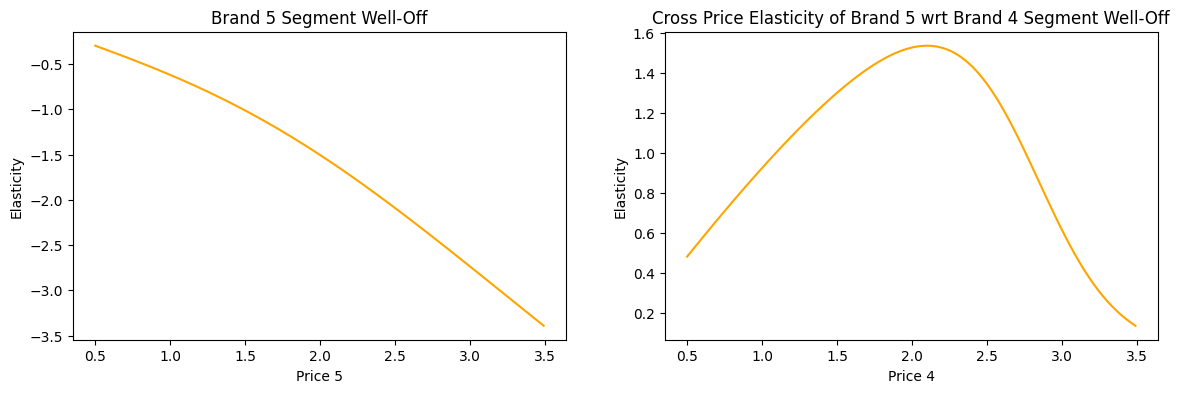

In [ ]:
# Using a figure with axes we plot the own brand and cross-brand price elasticities for brand 5 cross brand 4 side by side.
fig, axs = plt.subplots(1, 2, figsize = (14, 4))
axs[0].plot(price_range, own_price_elasticity_brand_5_s3, color = 'orange')
axs[0].set_title('Brand 5 Segment Well-Off')
axs[0].set_xlabel('Price 5')

axs[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, color = 'orange')
axs[1].set_title('Cross Price Elasticity of Brand 5 wrt Brand 4 Segment Well-Off')
axs[1].set_xlabel('Price 4')

for ax in axs.flat:
    ax.set(ylabel = 'Elasticity')

min and max for price_5 : 2.11 and 2.8

the own price elasticity indicates that teh well-off customer is elastic to our own brand.

if we check the descriptive analysis table(heatmap), we can verify that indeed over 60% of the well-off segment purchased brand 4 at about 20% buy brand 5.

th epositive cross elasticity indicating that for teh well_off brand 4 is a substitute for brand 5.

say brand 5 costs 2.4 dollars
:own elasticity is aboit -1.96~2

moreover brand 4 costs 2 dollars: the cross priceelasticity is about 1.52

what would happen if our competitor brand 4 losses price by one percen?

the cross price elasticity is 1.52, so teh purchases probability of our brand will fall by 1.52%.

we can lower our own price by one percent.in that case we must look at the own price elasticity of our brand. since it is -2, 1%decrease in our price would be reflected in a 2% increase in purchase probability.



the net effect of two price decrease is 2-1.52 or 0.5%

therefore we have reacted to our competitors price range and have actually gained some market share

if brand 4 decrease their price by one percent, the purchase probability for our brand would decrease by 1.52%.

to match that by our own price decrease, we can make an equation:
X * 2=1.52  (X is the decrease in price we require to reach a 1.52% increase)

X=0.75%: if brand 4 decrease their price by 1%, we can decrease ours by 0.75% and theoretically we will not lose a single customer from the well-off segment.


# cross price elasticity of brand choice probability of brand 5 with respect to brand 4 for the three remaining segments

- Standard’ – Segment 0

- Fewer-opportunities – segment 2

- ‘Well-off’ – segment 3

##standard

In [ ]:
brand_choice_s0 = df_pa[df_pa['Incidence']==1]
brand_choice_s0 = brand_choice_s0[brand_choice_s0['Segment']==0]

In [ ]:
# Brand Choice Model estimation.
Y = brand_choice_s0['Brand']
brand_choice_s0 = pd.get_dummies(brand_choice_s0, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s0[features]
model_brand_choice_s0 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s0.fit(X, Y)

# Coefficients table for segment 0
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s0.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,coef_Brand_1,coef_Brand_2,coef_Brand_3,coef_Brand_4,coef_Brand_5
Price_1,-3.01,1.09,1.19,0.27,0.47
Price_2,0.75,-2.06,0.46,0.37,0.48
Price_3,1.20,-0.50,0.36,-0.06,-1.00
Price_4,0.44,-0.28,0.99,-1.25,0.11
Price_5,-0.07,1.40,0.68,-0.86,-1.15


In [ ]:
# Calculating own-brand price elasticity for brand 5 and the Well-off segment.
df_own_brand_5_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_own_brand_5_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_own_brand_5_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_own_brand_5_s0['Price_4'] = brand_choice_s0['Price_4'].mean()
df_own_brand_5_s0['Price_5'] = price_range

predict_own_brand_5_s0 = model_brand_choice_s0.predict_proba(df_own_brand_5_s0)
pr_own_brand_5_s0 = predict_own_brand_5_s0[: ][: , 4]

own_price_elasticity_brand_5_s0 =  beta5 * price_range * (1 - pr_own_brand_5_s0)
df_price_elasticities['Brand 5 S0'] = own_price_elasticity_brand_5_s0

In [ ]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Well-off segment.
df_brand5_cross_brand4_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_brand5_cross_brand4_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_brand5_cross_brand4_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_brand5_cross_brand4_s0['Price_4'] = price_range
df_brand5_cross_brand4_s0['Price_5'] = brand_choice_s0['Price_5'].mean()

predict_brand5_cross_brand4_s0 = model_brand_choice_s0.predict_proba(df_brand5_cross_brand4_s0)
pr_cross_brand_5_s0 = predict_brand5_cross_brand4_s0[: ][: , 3]

# Update master data frame to include the newly obtained cross-brand price elasticities.
brand5_cross_brand4_price_elasticity_s0 = -beta5 * price_range * pr_cross_brand_5_s0
df_price_elasticities['Brand_5_Cross_Brand_4_S3'] = brand5_cross_brand4_price_elasticity_s0
pd.options.display.max_rows = None
df_price_elasticities

,Price_point,Mean_PE,PE_segment_1,PE_segment_2,PE_segment_0,PE_segment_3,Elasticity_promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_cross_brand_4,Brand 5 S3,Brand_5_Cross_Brand_4_S3,Brand 5 S0
0,0.50,-0.096426,-0.119112,-0.030797,-0.211187,-0.168092,-0.125687,-0.195584,-0.049055,0.332011,-0.297290,0.174108,-0.115827
1,0.51,-0.100495,-0.123296,-0.032556,-0.217757,-0.173019,-0.129802,-0.201703,-0.050616,0.337287,-0.303336,0.176163,-0.118866
2,0.52,-0.104691,-0.127573,-0.034401,-0.224436,-0.178016,-0.133995,-0.207925,-0.052206,0.342506,-0.309392,0.178168,-0.121940
3,0.53,-0.109017,-0.131945,-0.036337,-0.231222,-0.183084,-0.138268,-0.214249,-0.053827,0.347668,-0.315459,0.180122,-0.125049
4,0.54,-0.113477,-0.136413,-0.038367,-0.238119,-0.188223,-0.142622,-0.220678,-0.055477,0.352773,-0.321537,0.182025,-0.128194
5,0.55,-0.118073,-0.140979,-0.040495,-0.245125,-0.193434,-0.147058,-0.227212,-0.057158,0.357820,-0.327627,0.183878,-0.131374
6,0.56,-0.122809,-0.145645,-0.042727,-0.252242,-0.198718,-0.151577,-0.233851,-0.058870,0.362809,-0.333728,0.185682,-0.134592
7,0.57,-0.127688,-0.150411,-0.045065,-0.259470,-0.204074,-0.156179,-0.240597,-0.060614,0.367740,-0.339841,0.187436,-0.137846
8,0.58,-0.132714,-0.155279,-0.047516,-0.266811,-0.209504,-0.160867,-0.247449,-0.062390,0.372614,-0.345967,0.189141,-0.141138
9,0.59,-0.137890,-0.160251,-0.050084,-0.274264,-0.215007,-0.165640,-0.254410,-0.064199,0.377429,-0.352107,0.190798,-0.144468


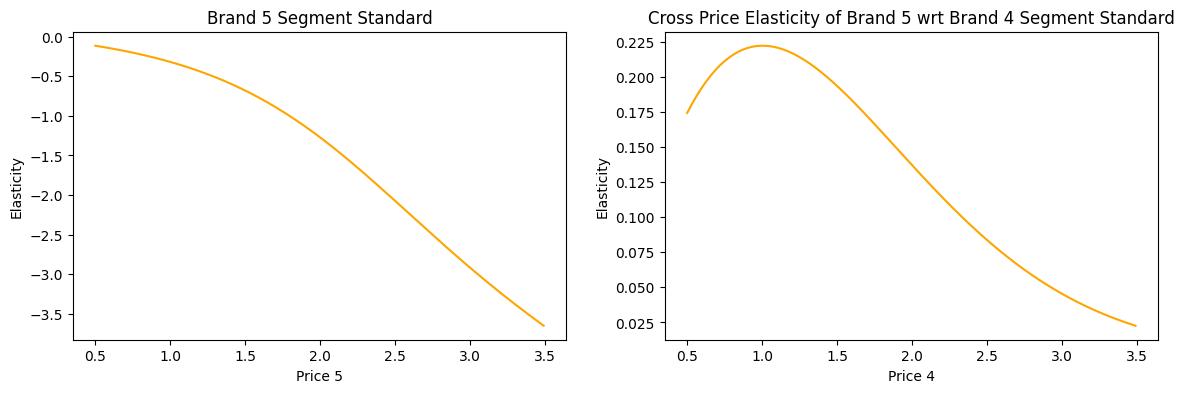

In [ ]:
# Using a figure with axes we plot the own brand and cross-brand price elasticities for brand 5 cross brand 4 side by side.
fig, axs = plt.subplots(1, 2, figsize = (14, 4))
axs[0].plot(price_range, own_price_elasticity_brand_5_s0, color = 'orange')
axs[0].set_title('Brand 5 Segment Standard')
axs[0].set_xlabel('Price 5')

axs[1].plot(price_range, brand5_cross_brand4_price_elasticity_s0, color = 'orange')
axs[1].set_title('Cross Price Elasticity of Brand 5 wrt Brand 4 Segment Standard')
axs[1].set_xlabel('Price 4')

for ax in axs.flat:
    ax.set(ylabel = 'Elasticity')

##Career-Focused

In [ ]:
# Filter data by the Career-focused segment, which is the first segment.
brand_choice_s1 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s1 = brand_choice_s1[brand_choice_s1['Segment'] == 1]

In [ ]:
# Brand Choice Model estimation.
Y = brand_choice_s1['Brand']
brand_choice_s1 = pd.get_dummies(brand_choice_s1, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s1[features]
model_brand_choice_s1 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s1.fit(X, Y)

# Coefficients table segment 1
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s1.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

In [ ]:
# Calculating own-brand price elasticity for brand 5 and the Career-focused segment.
df_own_brand_5_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_own_brand_5_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_own_brand_5_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_own_brand_5_s1['Price_4'] = brand_choice_s1['Price_4'].mean()
df_own_brand_5_s1['Price_5'] = price_range

predict_own_brand_5_s1 = model_brand_choice_s1.predict_proba(df_own_brand_5_s1)
pr_own_brand_5_s1 = predict_own_brand_5_s1[: ][: , 4]

#compute price elasticities and update data frame
own_price_elasticity_brand_5_s1 =  beta5 * price_range * (1 - pr_own_brand_5_s1)
df_price_elasticities.insert(12, column = 'Brand 5 S1', value = own_price_elasticity_brand_5_s1)

In [ ]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Career-focused segment.
df_brand5_cross_brand4_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_brand5_cross_brand4_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_brand5_cross_brand4_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_brand5_cross_brand4_s1['Price_4'] = price_range
df_brand5_cross_brand4_s1['Price_5'] = brand_choice_s1['Price_5'].mean()

predict_brand5_cross_brand4_s1 = model_brand_choice_s1.predict_proba(df_brand5_cross_brand4_s1)
pr_cross_brand_5_s1 = predict_brand5_cross_brand4_s1[: ][: , 3]

brand5_cross_brand4_price_elasticity_s1 = -beta5 * price_range * pr_cross_brand_5_s1
df_price_elasticities.insert(13, column = 'Brand_5_Cross_Brand_4_S1', value = brand5_cross_brand4_price_elasticity_s1)

##Fewer-Opportunities

In [ ]:
# Filter data, select only purchases from segment 2, which is the Fewer-Opportunities segment.
brand_choice_s2 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s2 = brand_choice_s2[brand_choice_s2['Segment'] == 2]

In [ ]:
# Brand Choice Model estimation.
Y = brand_choice_s2['Brand']
brand_choice_s2 = pd.get_dummies(brand_choice_s2, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s2[features]
model_brand_choice_s2 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s2.fit(X, Y)

# Coefficients table segment 2
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s2.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

In [ ]:
# Calculating own-brand price elasticity for brand 5 and the Fewer-opportunities segment.
df_own_brand_5_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_own_brand_5_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_own_brand_5_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_own_brand_5_s2['Price_4'] = brand_choice_s2['Price_4'].mean()
df_own_brand_5_s2['Price_5'] = price_range

predict_own_brand_5_s2 = model_brand_choice_s2.predict_proba(df_own_brand_5_s2)
pr_own_brand_5_s2 = predict_own_brand_5_s2[: ][: , 4]

#compute price elasticities and update data frame
own_price_elasticity_brand_5_s2 =  beta5 * price_range * (1 - pr_own_brand_5_s2)
df_price_elasticities.insert(14, column = 'Brand 5 S2', value = own_price_elasticity_brand_5_s2)

In [ ]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Fewer-opportunities segment.
df_brand5_cross_brand4_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_brand5_cross_brand4_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_brand5_cross_brand4_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_brand5_cross_brand4_s2['Price_4'] = price_range
df_brand5_cross_brand4_s2['Price_5'] = brand_choice_s2['Price_5'].mean()

predict_brand5_cross_brand4_s2 = model_brand_choice_s2.predict_proba(df_brand5_cross_brand4_s2)
pr_cross_brand_5_s2 = predict_brand5_cross_brand4_s2[: ][: , 3]

brand5_cross_brand4_price_elasticity_s2 = -beta5 * price_range * pr_cross_brand_5_s2
df_price_elasticities.insert(15, column = 'Brand_5_Cross_Brand_4_S2', value = brand5_cross_brand4_price_elasticity_s2)
df_price_elasticities

,Price_point,Mean_PE,PE_segment_1,PE_segment_2,PE_segment_0,PE_segment_3,Elasticity_promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_cross_brand_4,Brand 5 S3,Brand_5_Cross_Brand_4_S3,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2,Brand 5 S0
0,0.50,-0.096426,-0.119112,-0.030797,-0.211187,-0.168092,-0.125687,-0.195584,-0.049055,0.332011,-0.297290,0.174108,-0.043941,0.194772,-0.001036,0.181601,-0.115827
1,0.51,-0.100495,-0.123296,-0.032556,-0.217757,-0.173019,-0.129802,-0.201703,-0.050616,0.337287,-0.303336,0.176163,-0.045027,0.197256,-0.001098,0.183898,-0.118866
2,0.52,-0.104691,-0.127573,-0.034401,-0.224436,-0.178016,-0.133995,-0.207925,-0.052206,0.342506,-0.309392,0.178168,-0.046123,0.199689,-0.001163,0.186147,-0.121940
3,0.53,-0.109017,-0.131945,-0.036337,-0.231222,-0.183084,-0.138268,-0.214249,-0.053827,0.347668,-0.315459,0.180122,-0.047229,0.202071,-0.001231,0.188346,-0.125049
4,0.54,-0.113477,-0.136413,-0.038367,-0.238119,-0.188223,-0.142622,-0.220678,-0.055477,0.352773,-0.321537,0.182025,-0.048344,0.204403,-0.001303,0.190497,-0.128194
5,0.55,-0.118073,-0.140979,-0.040495,-0.245125,-0.193434,-0.147058,-0.227212,-0.057158,0.357820,-0.327627,0.183878,-0.049468,0.206685,-0.001378,0.192600,-0.131374
6,0.56,-0.122809,-0.145645,-0.042727,-0.252242,-0.198718,-0.151577,-0.233851,-0.058870,0.362809,-0.333728,0.185682,-0.050602,0.208918,-0.001458,0.194655,-0.134592
7,0.57,-0.127688,-0.150411,-0.045065,-0.259470,-0.204074,-0.156179,-0.240597,-0.060614,0.367740,-0.339841,0.187436,-0.051746,0.211101,-0.001541,0.196662,-0.137846
8,0.58,-0.132714,-0.155279,-0.047516,-0.266811,-0.209504,-0.160867,-0.247449,-0.062390,0.372614,-0.345967,0.189141,-0.052899,0.213235,-0.001629,0.198622,-0.141138
9,0.59,-0.137890,-0.160251,-0.050084,-0.274264,-0.215007,-0.165640,-0.254410,-0.064199,0.377429,-0.352107,0.190798,-0.054062,0.215321,-0.001722,0.200535,-0.144468


Text(0.5, 0, 'Price 4')

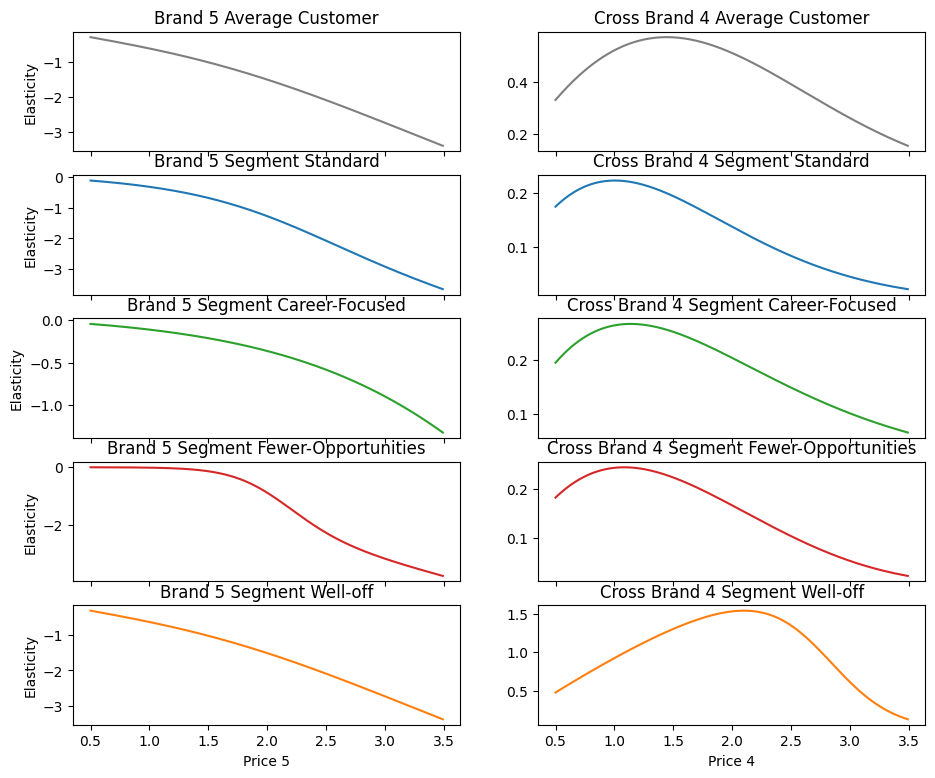

In [ ]:
# We plot the own and cross brand price elasticities for the average customer and each of the four segments.
# We can observe differences and similiraties between the segments and examine their preference, when it comes to brand choice.
# The two segments, which seem to be of most interested for the marketing team of brand 5, seem to be the Career-focused
# and the Well-off. They are also the segments which purchase this brand most often.
# The Career-focused segment is the most inelastic and they are the most loyal segment.
# Based on our model, they do not seem to be that affected by price, therefore brand 5 could increase its price,
# without fear of significant loss of customers from this segment.
# The Well-off segment on the other hand, seems to be more elastic. They also purchase the competitor brand 4 most often.
# In order to target this segment, our analysis signals, that price needs to be decreased. However, keep in mind
# that other factors aside from price might be influencing the purchase behaivour of this segment.
fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 2, figsize = (11, 9), sharex = True)
ax1[0].plot(price_range, own_price_elasticity_brand_5_s3, 'tab:grey')
ax1[0].set_title('Brand 5 Average Customer')
ax1[0].set_ylabel('Elasticity')
ax1[1].plot(price_range, brand5_cross_brand4_price_elasticity, 'tab:grey')
ax1[1].set_title('Cross Brand 4 Average Customer')


ax2[0].plot(price_range, own_price_elasticity_brand_5_s0)
ax2[0].set_title('Brand 5 Segment Standard')
ax2[0].set_ylabel('Elasticity')
ax2[1].plot(price_range, brand5_cross_brand4_price_elasticity_s0)
ax2[1].set_title('Cross Brand 4 Segment Standard')

ax3[0].plot(price_range, own_price_elasticity_brand_5_s1, 'tab:green')
ax3[0].set_title('Brand 5 Segment Career-Focused')
ax3[0].set_ylabel('Elasticity')
ax3[1].plot(price_range, brand5_cross_brand4_price_elasticity_s1, 'tab:green')
ax3[1].set_title('Cross Brand 4 Segment Career-Focused')

ax4[0].plot(price_range, own_price_elasticity_brand_5_s2, 'tab:red')
ax4[0].set_title('Brand 5 Segment Fewer-Opportunities')
ax4[0].set_ylabel('Elasticity')
ax4[1].plot(price_range, brand5_cross_brand4_price_elasticity_s2, 'tab:red')
ax4[1].set_title('Cross Brand 4 Segment Fewer-Opportunities')

ax5[0].plot(price_range, own_price_elasticity_brand_5_s3, 'tab:orange')
ax5[0].set_title('Brand 5 Segment Well-off')
ax5[0].set_xlabel('Price 5')
ax5[0].set_ylabel('Elasticity')
ax5[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, 'tab:orange')
ax5[1].set_title('Cross Brand 4 Segment Well-off')
ax5[1].set_xlabel('Price 4')

the price range for 2.1 to 2.8

standard: -1.2 and -2.7

purchase probability for teh own brand is elastic for teh entire observerd price range of brand. lower price in this price range to increase purchase probability for the segment.

career-focused:inelastic. this segment is not really affected by teh increase in price of teh own brand.they are unlikely to switch to teh competitor as you see teh cross brand elasticity.

this segment are called loyal and marketing team can increase prices of our own brand without fear of losing too much market share

fewer opportunity: inelastic at lower price and tehn they rapidly become to the most elastic at higher price.
thsi segment almost never buys brand  5 or brand 4. we don't have enough observations to obtain an accurate model.it is a reason why both curves look so out of character. this sehment are simply not teh target group.





#Modeling purchase quantity

In [ ]:
df_purchase_quantity = df_pa[df_pa['Incidence']==1]


In [ ]:
# Create brand dummies, for each of the five brands.
df_purchase_quantity = pd.get_dummies(df_purchase_quantity, columns = ['Brand'], prefix = 'Brand', prefix_sep = '_')
# The descriptive analysis of the purchase quantitiy data frame, shows that quantity ranges from 1 to 15
# and has an average value of 2.8, which means that more often than not our customers buy more than 1 chocolate candy bar.
df_purchase_quantity.describe()

,ID,Day,Incidence,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,...,Education,Income,Occupation,Settlement size,Segment,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
count,1.463800e+04,14638.000000,14638.0,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,...,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000
mean,2.000003e+08,359.607597,1.0,2.774559,1.535251,0.406955,1.384559,1.764717,2.006694,2.159658,...,1.151045,126706.452043,0.845471,0.797513,1.581910,0.092226,0.310288,0.057453,0.199959,0.340074
std,1.423786e+02,205.346253,0.0,1.796736,2.060858,0.491283,0.090944,0.181667,0.046200,0.093253,...,0.634625,39935.109358,0.633840,0.810358,1.028171,0.289354,0.462627,0.232714,0.399983,0.473750
min,2.000000e+08,1.000000,1.0,1.000000,0.000000,0.000000,1.100000,1.260000,1.870000,1.760000,...,0.000000,38247.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000001e+08,175.000000,1.0,2.000000,0.000000,0.000000,1.340000,1.570000,1.970000,2.120000,...,1.000000,102723.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000003e+08,355.000000,1.0,2.000000,0.000000,0.000000,1.390000,1.880000,2.010000,2.180000,...,1.000000,122895.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000004e+08,532.000000,1.0,3.000000,4.000000,1.000000,1.470000,1.890000,2.060000,2.240000,...,2.000000,147967.000000,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,2.000005e+08,727.000000,1.0,15.000000,5.000000,1.000000,1.590000,1.900000,2.140000,2.260000,...,3.000000,309364.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_purchase_quantity.head()
df_purchase_quantity.describe()

,ID,Day,Incidence,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,...,Education,Income,Occupation,Settlement size,Segment,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
count,1.463800e+04,14638.000000,14638.0,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,...,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000
mean,2.000003e+08,359.607597,1.0,2.774559,1.535251,0.406955,1.384559,1.764717,2.006694,2.159658,...,1.151045,126706.452043,0.845471,0.797513,1.581910,0.092226,0.310288,0.057453,0.199959,0.340074
std,1.423786e+02,205.346253,0.0,1.796736,2.060858,0.491283,0.090944,0.181667,0.046200,0.093253,...,0.634625,39935.109358,0.633840,0.810358,1.028171,0.289354,0.462627,0.232714,0.399983,0.473750
min,2.000000e+08,1.000000,1.0,1.000000,0.000000,0.000000,1.100000,1.260000,1.870000,1.760000,...,0.000000,38247.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000001e+08,175.000000,1.0,2.000000,0.000000,0.000000,1.340000,1.570000,1.970000,2.120000,...,1.000000,102723.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000003e+08,355.000000,1.0,2.000000,0.000000,0.000000,1.390000,1.880000,2.010000,2.180000,...,1.000000,122895.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000004e+08,532.000000,1.0,3.000000,4.000000,1.000000,1.470000,1.890000,2.060000,2.240000,...,2.000000,147967.000000,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,2.000005e+08,727.000000,1.0,15.000000,5.000000,1.000000,1.590000,1.900000,2.140000,2.260000,...,3.000000,309364.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_purchase_quantity.columns

Index(['ID', 'Day', 'Incidence', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4',
       'Promotion_5', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size', 'Segment', 'Brand_1', 'Brand_2',
       'Brand_3', 'Brand_4', 'Brand_5'],
      dtype='object')

In [ ]:
#Find the price of the product that is chosen at this incidence
df_purchase_quantity['Price_Incidence'] = (df_purchase_quantity['Brand_1'] * df_purchase_quantity['Price_1'] +
                                           df_purchase_quantity['Brand_2'] * df_purchase_quantity['Price_2'] +
                                           df_purchase_quantity['Brand_3'] * df_purchase_quantity['Price_3'] +
                                           df_purchase_quantity['Brand_4'] * df_purchase_quantity['Price_4'] +
                                           df_purchase_quantity['Brand_5'] * df_purchase_quantity['Price_5'] )

In [ ]:
#Find the price of the product that is chosen at this incidence
df_purchase_quantity['Promotion_Incidence'] = (df_purchase_quantity['Brand_1'] * df_purchase_quantity['Promotion_1'] +
                                               df_purchase_quantity['Brand_2'] * df_purchase_quantity['Promotion_2'] +
                                               df_purchase_quantity['Brand_3'] * df_purchase_quantity['Promotion_3'] +
                                               df_purchase_quantity['Brand_4'] * df_purchase_quantity['Promotion_4'] +
                                               df_purchase_quantity['Brand_5'] * df_purchase_quantity['Promotion_5'] )

In [ ]:
X = df_purchase_quantity[['Price_Incidence', 'Promotion_Incidence']]
pd.options.display.max_rows = 100
X

,Price_Incidence,Promotion_Incidence
6,1.90,0
11,2.62,1
19,1.47,0
24,2.16,0
29,1.88,0
...,...,...
58621,1.89,0
58648,1.35,1
58674,1.85,1
58687,1.51,0


In [ ]:
Y = df_purchase_quantity['Quantity']
Y.head()

6     2
11    1
19    2
24    1
29    3
Name: Quantity, dtype: int64

In [ ]:
# Linear Regression Model
model_quantity = LinearRegression()
model_quantity.fit(X, Y)

LinearRegression()

In [ ]:
model_quantity.coef_

array([-0.8173651 , -0.10504673])

-0.82 shows that as price increases, purchase quantity decrease
-0.11: a promotion is promoting a customer to try our a new brand in that case we would not expect them to buy many chocolates

##Price Elasticity Estimation

the percentage change in purchase quantity in response to a one percent change in teh unit price of teh chosen brand

In [ ]:
 # We examine the price elasticity of purchase quantity with active promotional activities for each price point.
df_price_elasticity_quantity = pd.DataFrame(index = np.arange(price_range.size))
df_price_elasticity_quantity['Price_Incidence'] = price_range
df_price_elasticity_quantity['Promotion_Incidence'] = 1

E = beta*(price/quantity)

In [ ]:
#Take the coefficient for price.
beta_quantity = model_quantity.coef_[0]
beta_quantity

-0.8173651016684991

In [ ]:
predict_quantity = model_quantity.predict(df_price_elasticity_quantity)
# We calculate the price elasticity with our new formula. It is the beta coefficient for price multiplied by price
# and divided by the purchase quantity.
price_elasticity_quantity_promotion_yes = beta_quantity * price_range / predict_quantity

In [ ]:
df_price_elasticities['PE_Quantity_Promotion_1'] = price_elasticity_quantity_promotion_yes
df_price_elasticities

,Price_point,Mean_PE,PE_segment_1,PE_segment_2,PE_segment_0,PE_segment_3,Elasticity_promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_cross_brand_4,Brand 5 S3,Brand_5_Cross_Brand_4_S3,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2,Brand 5 S0,PE_Quantity_Promotion_1
0,0.50,-0.096426,-0.119112,-0.030797,-0.211187,-0.168092,-0.125687,-0.195584,-0.049055,0.332011,-0.297290,0.174108,-0.043941,0.194772,-0.001036,0.181601,-0.115827,-0.102157
1,0.51,-0.100495,-0.123296,-0.032556,-0.217757,-0.173019,-0.129802,-0.201703,-0.050616,0.337287,-0.303336,0.176163,-0.045027,0.197256,-0.001098,0.183898,-0.118866,-0.104413
2,0.52,-0.104691,-0.127573,-0.034401,-0.224436,-0.178016,-0.133995,-0.207925,-0.052206,0.342506,-0.309392,0.178168,-0.046123,0.199689,-0.001163,0.186147,-0.121940,-0.106679
3,0.53,-0.109017,-0.131945,-0.036337,-0.231222,-0.183084,-0.138268,-0.214249,-0.053827,0.347668,-0.315459,0.180122,-0.047229,0.202071,-0.001231,0.188346,-0.125049,-0.108954
4,0.54,-0.113477,-0.136413,-0.038367,-0.238119,-0.188223,-0.142622,-0.220678,-0.055477,0.352773,-0.321537,0.182025,-0.048344,0.204403,-0.001303,0.190497,-0.128194,-0.111238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.012341,-5.681134,-12.530901,-5.051622,-4.023831,-4.860111,-4.981837,-3.231570,0.162237,-3.337318,0.024054,-1.287426,0.068592,-3.746081,0.023405,-3.592457,-1.774292
296,3.46,-8.037589,-5.701291,-12.567793,-5.068477,-4.038702,-4.878311,-4.998740,-3.247764,0.160337,-3.350649,0.023697,-1.297236,0.067969,-3.757523,0.022945,-3.606361,-1.788634
297,3.47,-8.062802,-5.721410,-12.604667,-5.085314,-4.053556,-4.896480,-5.015624,-3.263926,0.158451,-3.363976,0.023345,-1.307100,0.067351,-3.768945,0.022492,-3.620222,-1.803124
298,3.48,-8.087982,-5.741494,-12.641525,-5.102133,-4.068395,-4.914619,-5.032488,-3.280056,0.156579,-3.377300,0.022998,-1.317019,0.066737,-3.780347,0.022047,-3.634038,-1.817766


Text(0.5, 1.0, 'Price Elasticity of Purchase Quantity with Promotion')

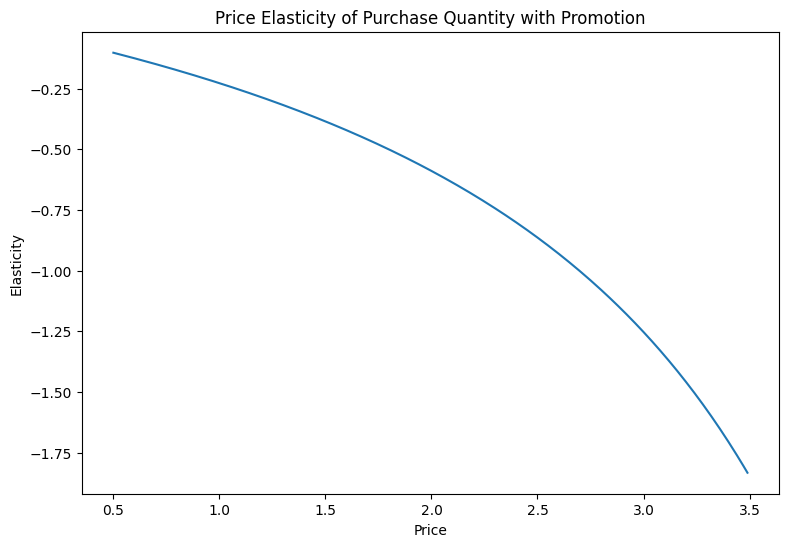

In [ ]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion')

##No Promotion

In [ ]:
df_price_elasticity_quantity['Promotion_Incidence'] = 0

predict_quantity = model_quantity.predict(df_price_elasticity_quantity)

price_elasticity_quantity_promotion_no = beta_quantity * price_range / predict_quantity

df_price_elasticities['PE_Quantity_Promotion_0'] = price_elasticity_quantity_promotion_no
df_price_elasticities

,Price_point,Mean_PE,PE_segment_1,PE_segment_2,PE_segment_0,PE_segment_3,Elasticity_promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_cross_brand_4,Brand 5 S3,Brand_5_Cross_Brand_4_S3,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2,Brand 5 S0,PE_Quantity_Promotion_1,PE_Quantity_Promotion_0
0,0.50,-0.096426,-0.119112,-0.030797,-0.211187,-0.168092,-0.125687,-0.195584,-0.049055,0.332011,-0.297290,0.174108,-0.043941,0.194772,-0.001036,0.181601,-0.115827,-0.102157,-0.099543
1,0.51,-0.100495,-0.123296,-0.032556,-0.217757,-0.173019,-0.129802,-0.201703,-0.050616,0.337287,-0.303336,0.176163,-0.045027,0.197256,-0.001098,0.183898,-0.118866,-0.104413,-0.101736
2,0.52,-0.104691,-0.127573,-0.034401,-0.224436,-0.178016,-0.133995,-0.207925,-0.052206,0.342506,-0.309392,0.178168,-0.046123,0.199689,-0.001163,0.186147,-0.121940,-0.106679,-0.103939
3,0.53,-0.109017,-0.131945,-0.036337,-0.231222,-0.183084,-0.138268,-0.214249,-0.053827,0.347668,-0.315459,0.180122,-0.047229,0.202071,-0.001231,0.188346,-0.125049,-0.108954,-0.106150
4,0.54,-0.113477,-0.136413,-0.038367,-0.238119,-0.188223,-0.142622,-0.220678,-0.055477,0.352773,-0.321537,0.182025,-0.048344,0.204403,-0.001303,0.190497,-0.128194,-0.111238,-0.108369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.012341,-5.681134,-12.530901,-5.051622,-4.023831,-4.860111,-4.981837,-3.231570,0.162237,-3.337318,0.024054,-1.287426,0.068592,-3.746081,0.023405,-3.592457,-1.774292,-1.664290
296,3.46,-8.037589,-5.701291,-12.567793,-5.068477,-4.038702,-4.878311,-4.998740,-3.247764,0.160337,-3.350649,0.023697,-1.297236,0.067969,-3.757523,0.022945,-3.606361,-1.788634,-1.677205
297,3.47,-8.062802,-5.721410,-12.604667,-5.085314,-4.053556,-4.896480,-5.015624,-3.263926,0.158451,-3.363976,0.023345,-1.307100,0.067351,-3.768945,0.022492,-3.620222,-1.803124,-1.690246
298,3.48,-8.087982,-5.741494,-12.641525,-5.102133,-4.068395,-4.914619,-5.032488,-3.280056,0.156579,-3.377300,0.022998,-1.317019,0.066737,-3.780347,0.022047,-3.634038,-1.817766,-1.703414


Text(0.5, 1.0, 'Price Elasticity of Purchase Quantity with Promotion')

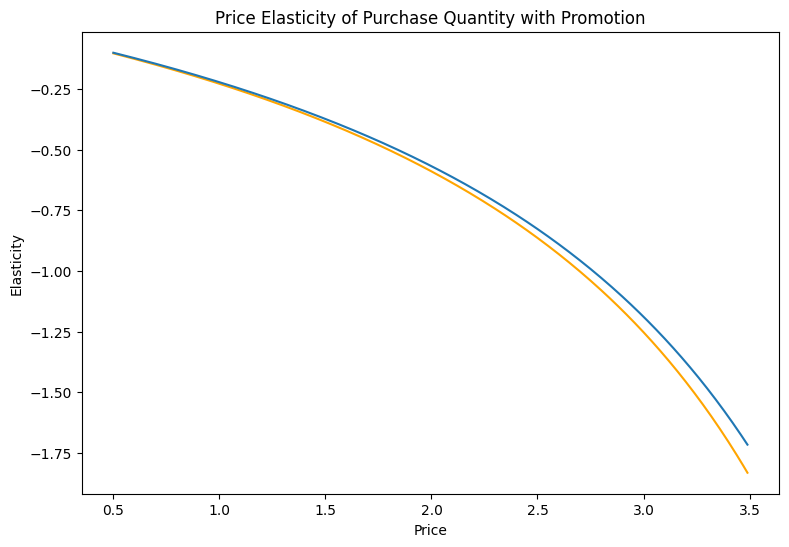

In [ ]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes, color = 'orange')
plt.plot(price_range, price_elasticity_quantity_promotion_no)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion')

promotion doesn't look like such a big facto, the two lines practically overlap. the variables was included in our model might not hold any predictive value.